In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
stats_df = pd.read_pickle("result_df.pkl")

In [3]:
stats_df

,function,dimension,algorithm,obj_lists,min_found_lists,avg_min_found,std_min_found
0,ackley,10,basinhopping,"[[21.23412, 21.23412, 21.23412, 21.23412, 21.2...","[[21.23412, 21.23412, 21.23412, 21.23412, 21.2...","[20.95322036743164, 20.95322036743164, 20.9532...","[0.4799298346042633, 0.4799298346042633, 0.479..."
1,ackley,10,differential_evolution,"[[20.970161, 21.383083, 21.541191, 21.367462, ...","[[20.970161, 20.970161, 20.970161, 20.970161, ...","[21.358928680419922, 21.04205322265625, 20.861...","[0.23468589782714844, 0.45797276496887207, 0.3..."
2,ackley,10,direct,"[[4.552539, 17.018728, 17.45362, 17.018728, 17...","[[4.552539, 4.552539, 4.552539, 4.552539, 4.55...","[4.552539, 4.552539, 4.552539, 4.552539, 4.552...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,ackley,10,dual_annealing,"[[21.551155, 21.254986, 21.6148, 20.65361, 21....","[[21.551155, 21.254986, 21.254986, 20.65361, 2...","[20.95322036743164, 20.893985748291016, 20.893...","[0.4799298346042633, 0.39916253089904785, 0.39..."
4,ackley,10,mcir,"[[21.122943878173828, 21.122943878173828, 21.1...","[[21.122943878173828, 21.122943878173828, 21.1...","[20.95499038696289, 20.95499038696289, 20.9549...","[0.4690623126870676, 0.4690623126870676, 0.469..."
...,...,...,...,...,...,...,...
117,watson,32,differential_evolution,"[[307303.9192011102, 300601.11886811716, 20247...","[[307303.9192011102, 300601.11886811716, 30060...","[6844500.333347577, 1662800.6946316964, 136326...","[11484157.537096405, 1726414.08927726, 1784276..."
118,watson,32,direct,"[[528043.0017411856, 528043.0017411856, 528043...","[[528043.0017411856, 528043.0017411856, 528043...","[528043.0017411856, 528043.0017411856, 528043....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
119,watson,32,dual_annealing,"[[452408.46655145474, 37596435.013013594, 6810...","[[452408.46655145474, 452408.46655145474, 6810...","[37751606.73584604, 3791722.58588769, 2881944....","[62101331.395239055, 5219180.813468672, 538362..."
120,watson,32,mcir,"[[651574.6720559866, 651574.6720559866, 651574...","[[651574.6720559866, 651574.6720559866, 651574...","[588816.5247719139, 588816.5247719139, 588816....","[88753.42303854393, 88753.42303854393, 88753.4..."


In [4]:
stats_df = stats_df.drop(stats_df[stats_df['algorithm'] == 'shgo'].index)

In [5]:
line_style_dict = {
    'basinhopping': {
        'color': u'#1f77b4',
        'linewidth': 1.5,
    },
    'differential_evolution': {
        'color': u'#ff7f0e',
        'linewidth': 1.5,
    },
    'direct': {
        'color': u'#2ca02c',
        'linewidth': 1.5,
    },
    'dual_annealing': {
        'color': u'#d62728',
        'linewidth': 1.5,
    },
    'mcir': {
        'color': 'black',
        'linewidth': 3.0,
    },
}

In [6]:
func_dim_paris = set()
for _, row in stats_df.iterrows():
    func_dim_paris.add((row['function'], row['dimension']))
func_dim_paris

{('ackley', 10),
 ('ackley', 50),
 ('ackley', 100),
 ('ackley', 200),
 ('biggsbi1', 1001),
 ('eigenals', 111),
 ('harkerp', 101),
 ('levy', 10),
 ('levy', 50),
 ('levy', 100),
 ('levy', 200),
 ('michalewicz', 10),
 ('michalewicz', 50),
 ('michalewicz', 100),
 ('michalewicz', 200),
 ('nn-ackley', 50),
 ('nn-ackley', 100),
 ('nn-michalewicz', 50),
 ('nn-michalewicz', 100),
 ('vardim', 101),
 ('watson', 32)}

In [7]:
def plot(stats_df, 
         function, 
         dimension, 
         xlim=None, 
         ylim=None, 
         log_x=False, 
         log_y=False, 
         exclude_algos=[], 
         figsize=(6, 4),
         dpi=300,
         legend=False,
         save_dir=None,
        ):
    
    plot_df = stats_df[(stats_df['function'] == function) & (stats_df['dimension'] == dimension)]
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    plt.locator_params(axis='x', nbins=5)
    plt.locator_params(axis='y', nbins=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    for row_idx in range(len(plot_df)):
        df_row = plot_df.iloc[row_idx]
        algorithm = df_row['algorithm']
        if algorithm not in line_style_dict:
            continue
        if algorithm in exclude_algos:
            continue
            
        style_dict = line_style_dict[algorithm]
        
        label = df_row['algorithm'].replace("_", " ").replace("mcir", "MCIR (ours)")
        
        means = df_row['avg_min_found']
        err = df_row['std_min_found']
        
        if xlim is not None and xlim[1] is not None:
            means = means[:xlim[1]]
            err = err[:xlim[1]]

        plt.plot([i for i in range(len(means))], means, label=label, 
                color=style_dict['color'], linewidth=style_dict['linewidth'], rasterized=True)
        plt.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, 
                        alpha=0.2, color=style_dict['color'], rasterized=True)
        
        if legend:
            plt.legend(fontsize=12)
        
        xlabel = '# samples'
        ylabel = 'f(x)'
        
        if log_x:
            plt.xscale('log')
            xlabel += ' (log scale)'
        if log_y:
            plt.yscale('log')
            ylabel += ' (log scale)'
            
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.gcf().subplots_adjust(bottom=0.15, left=0.15, top=0.95)

    if save_dir:
        fig.savefig(
            os.path.join(save_dir, "{}_{}.pdf").format(function, dimension), 
            dpi=dpi, 
            format='pdf',
        )
        
    plt.show()
    

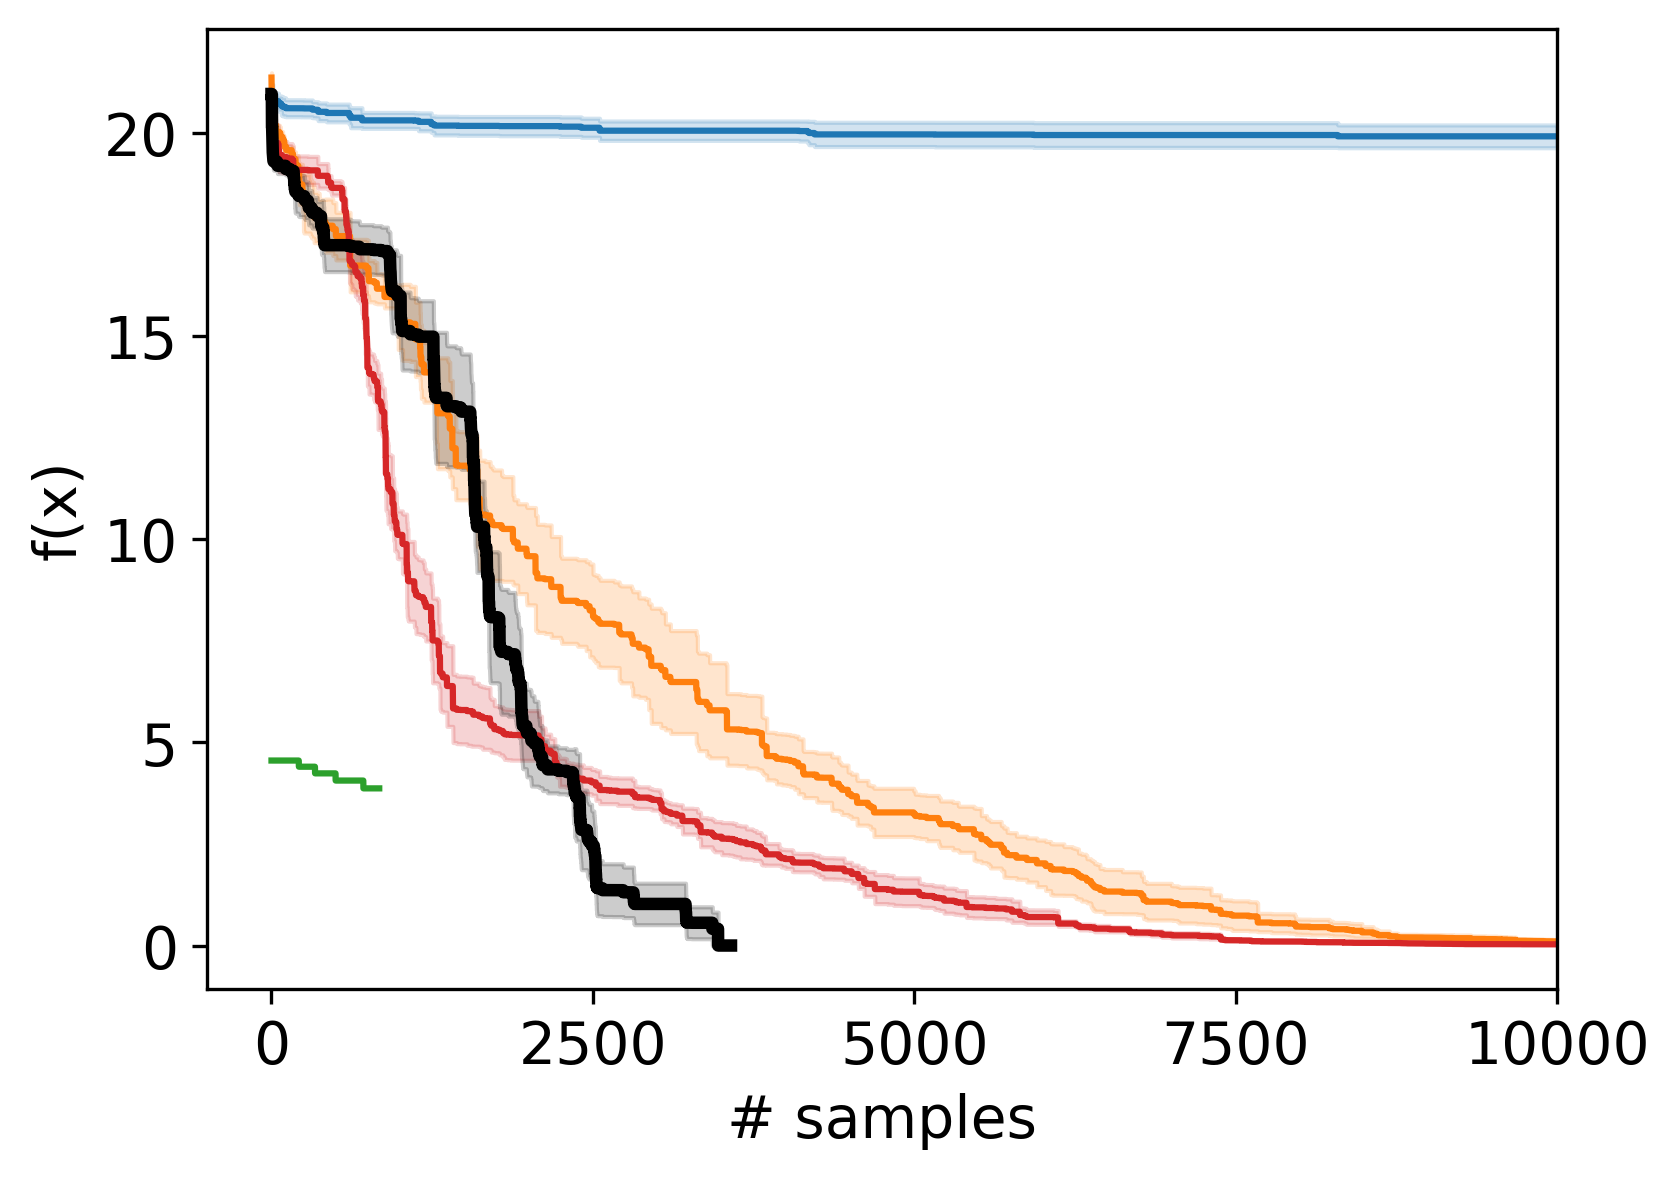

In [8]:
plot(stats_df, 'ackley', 10, xlim=[-500, 10000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

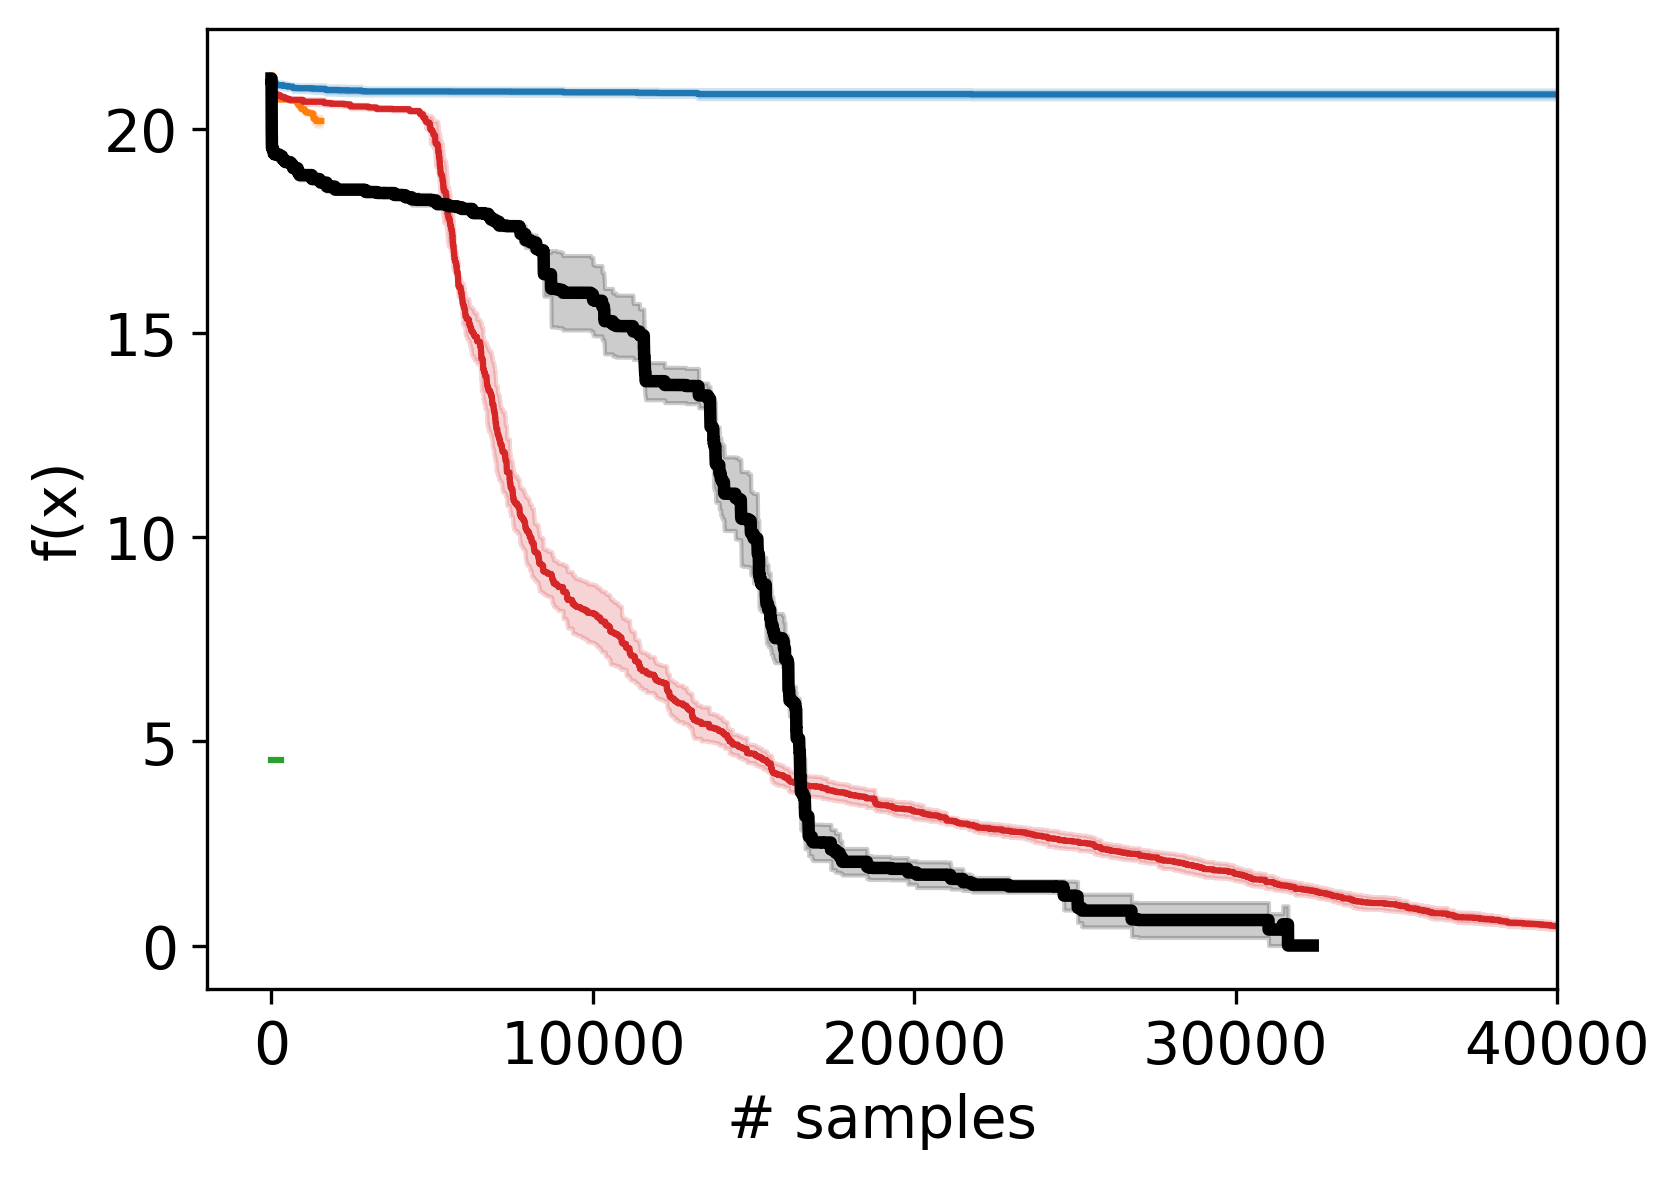

In [9]:
plot(stats_df, 'ackley', 50, xlim=[-2000, 40000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

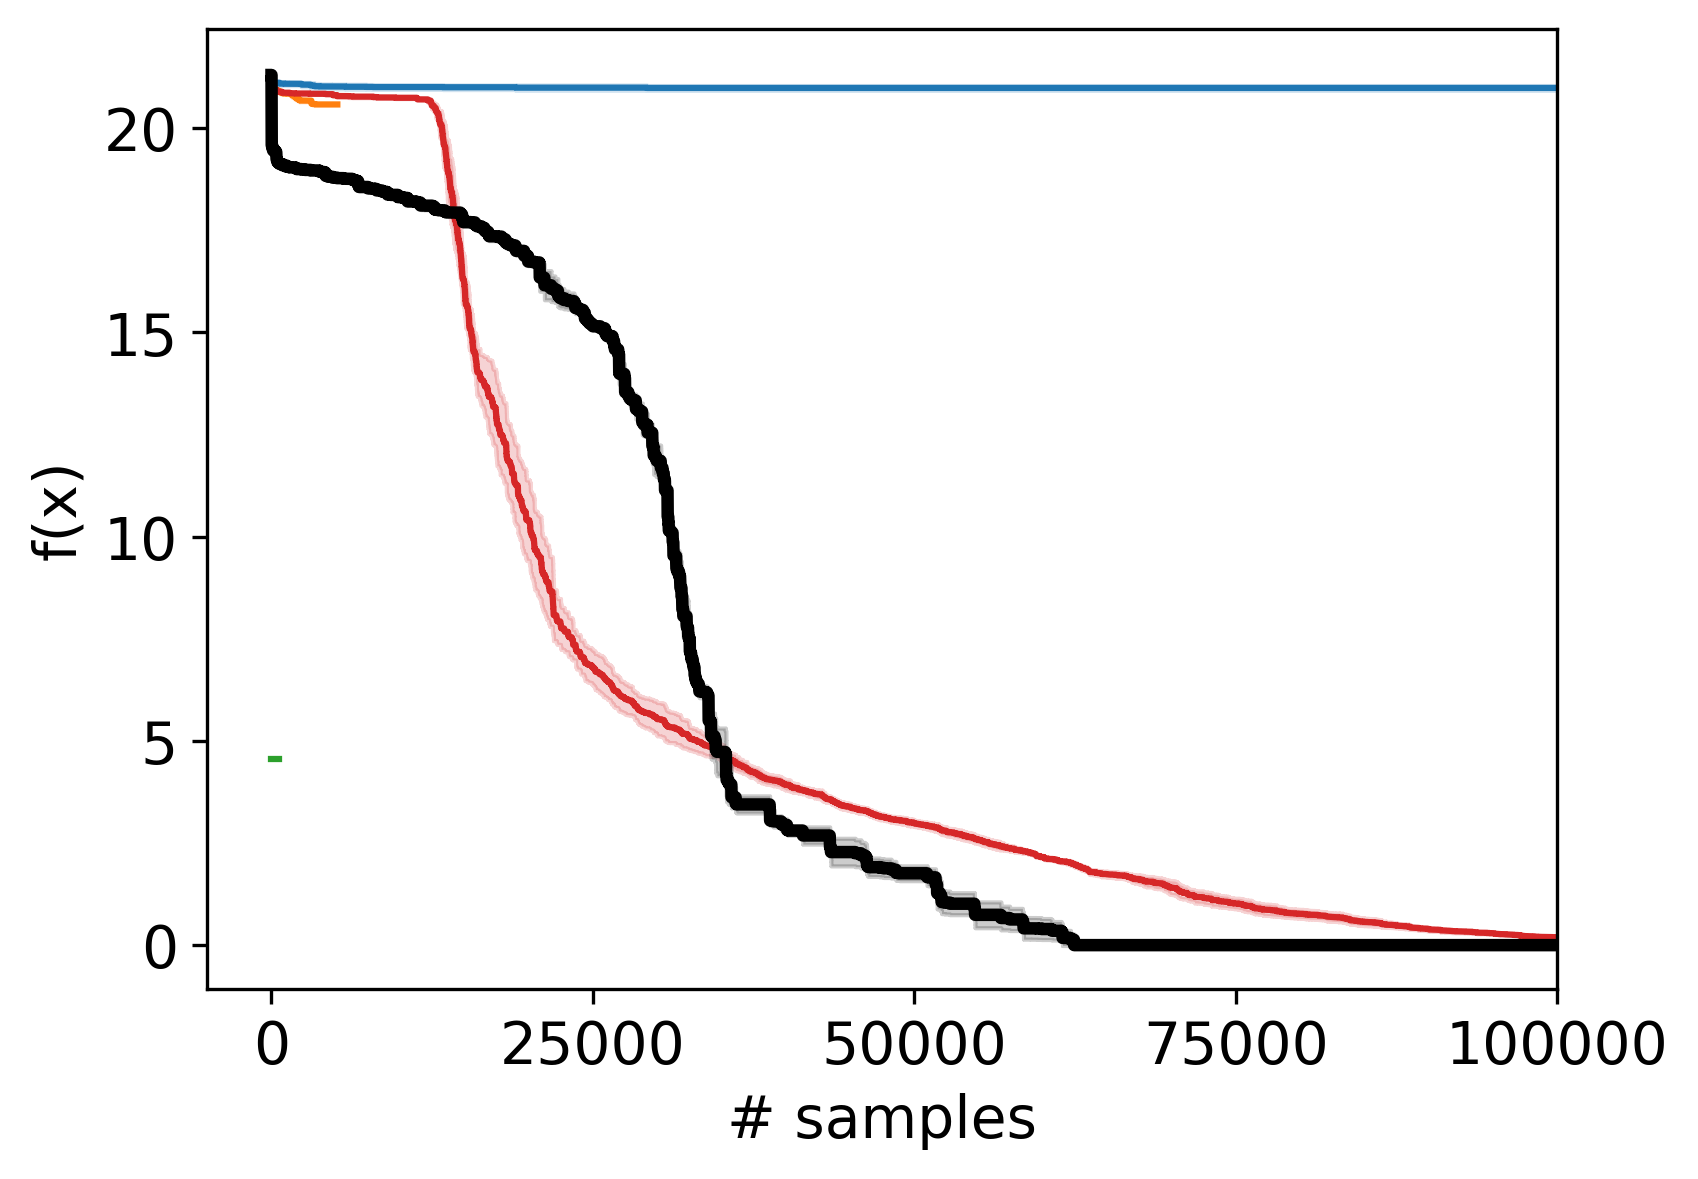

In [10]:
plot(stats_df, 'ackley', 100, xlim=[-5000, 100000], save_dir='/projects/mcmm/figures/')

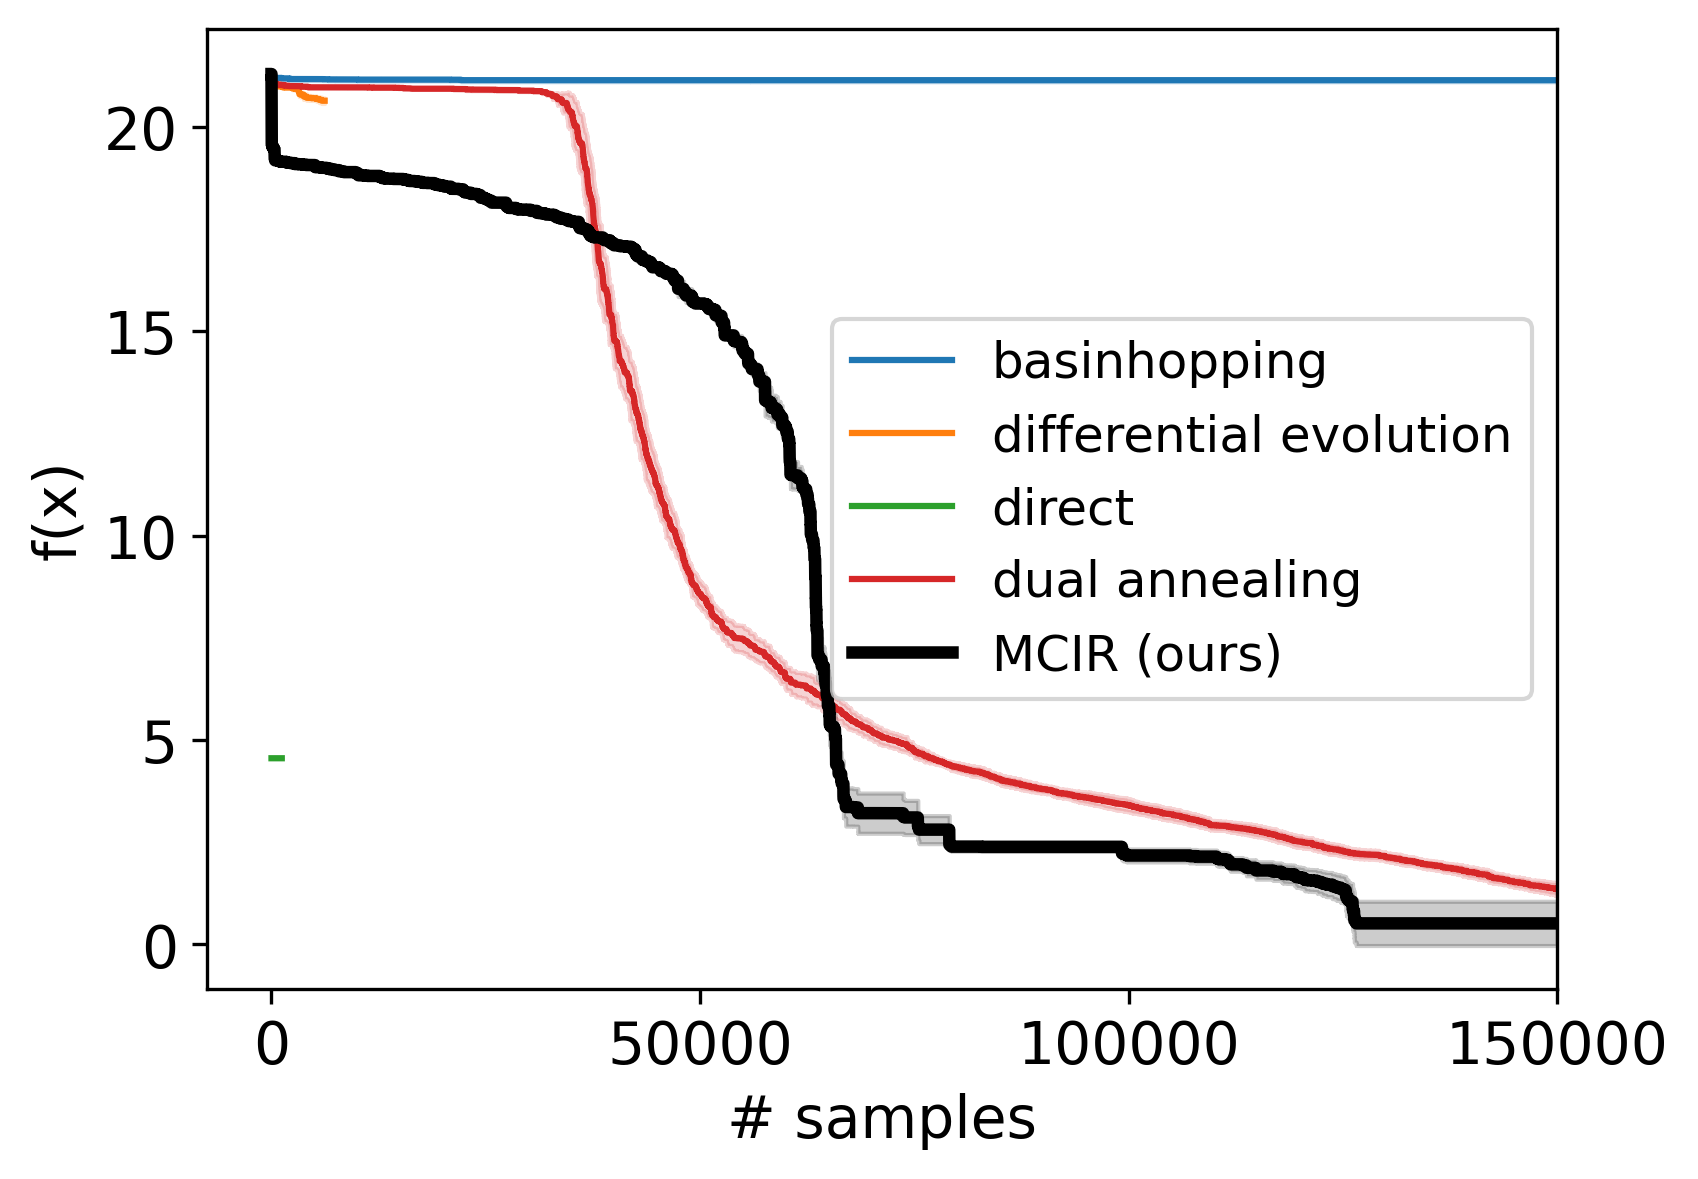

In [11]:
plot(stats_df, 'ackley', 200, xlim=[-7500, 150000], save_dir='/projects/mcmm/figures/', legend=True)

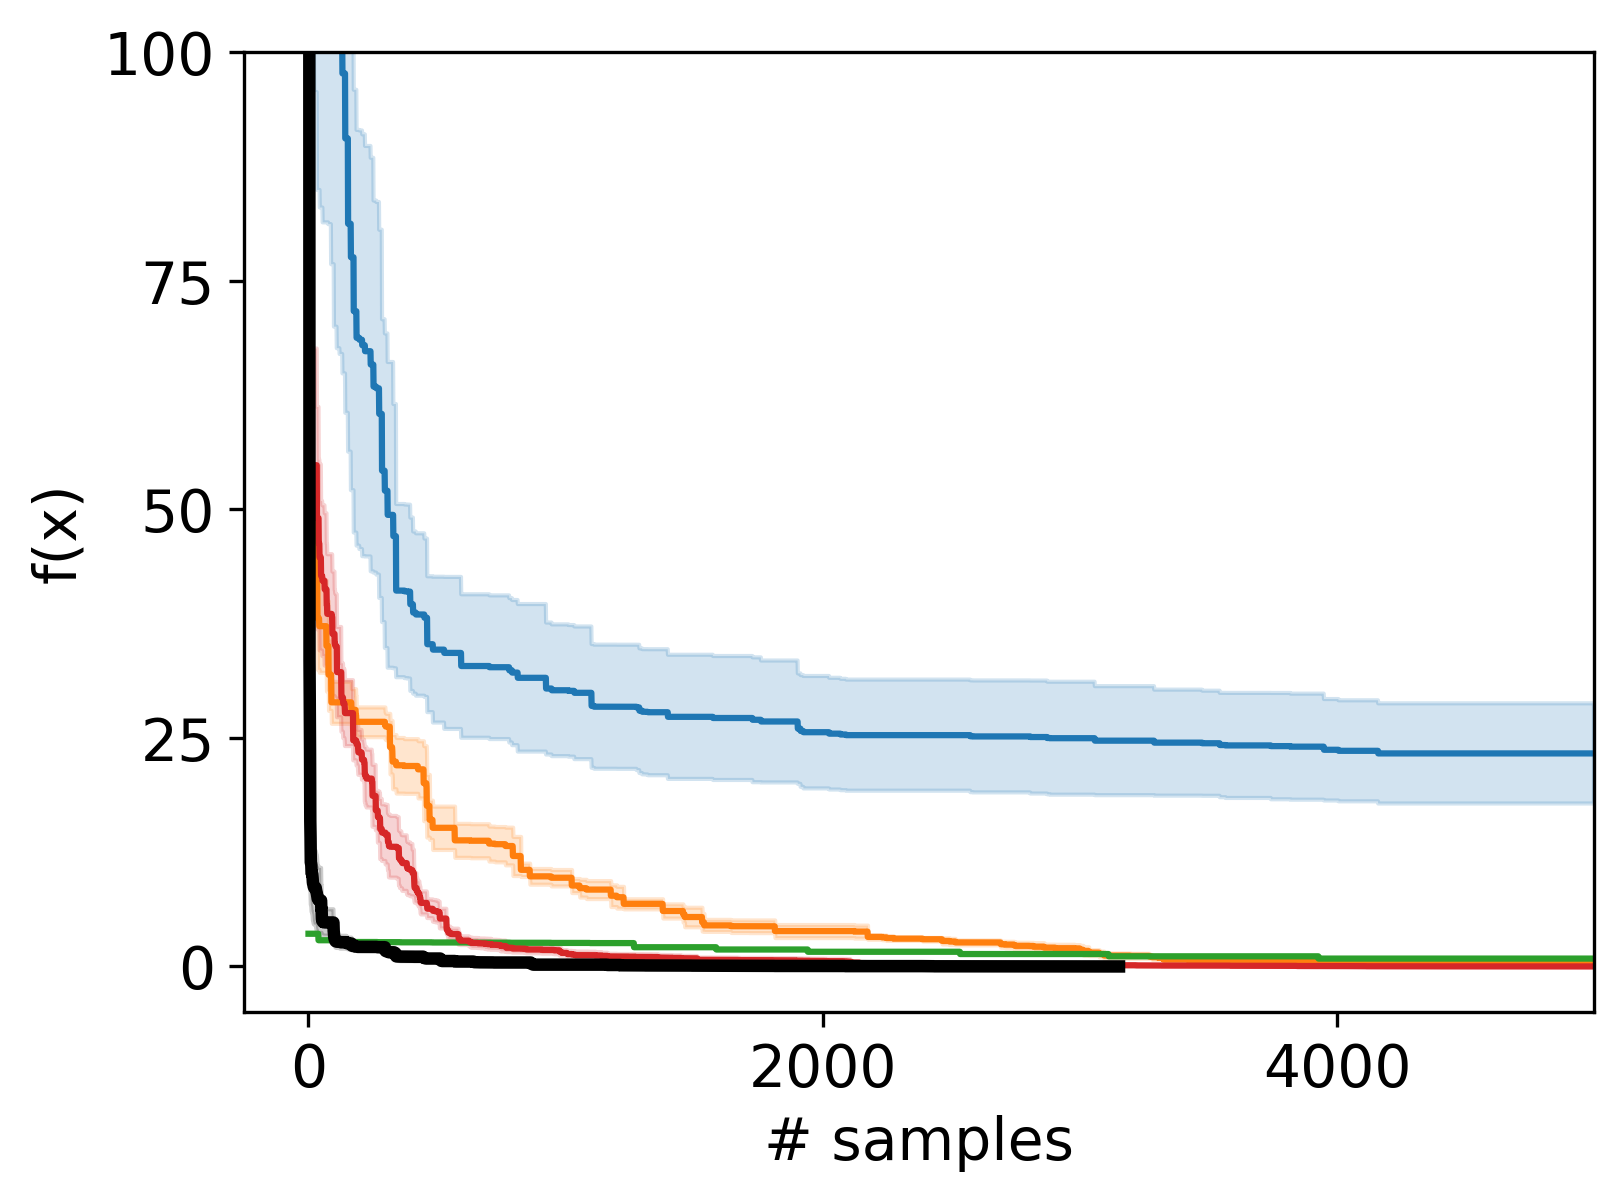

In [12]:
plot(stats_df, 'levy', 10, xlim=[-250, 5000], ylim=[-5, 100], save_dir='/projects/mcmm/figures/')

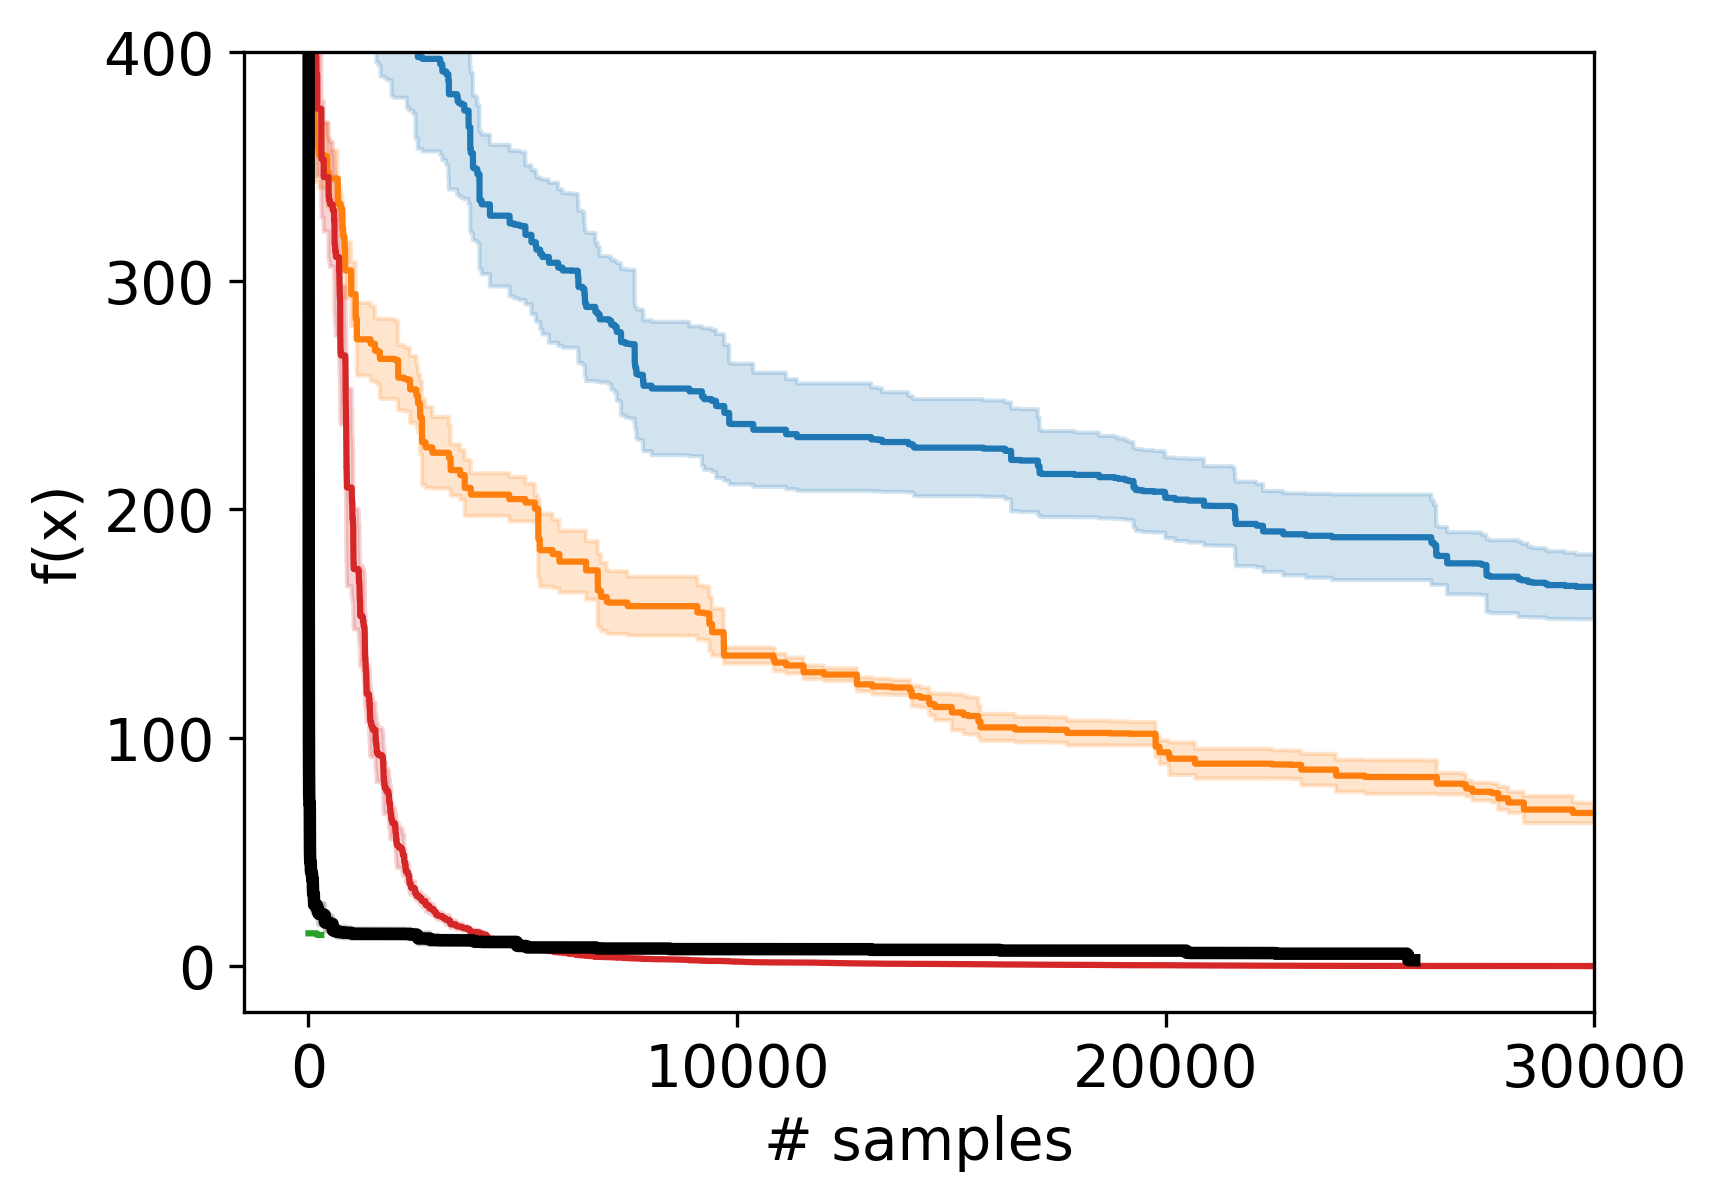

In [13]:
plot(stats_df, 'levy', 50, xlim=[-1500, 30000], ylim=[-20, 400], save_dir='/projects/mcmm/figures/')

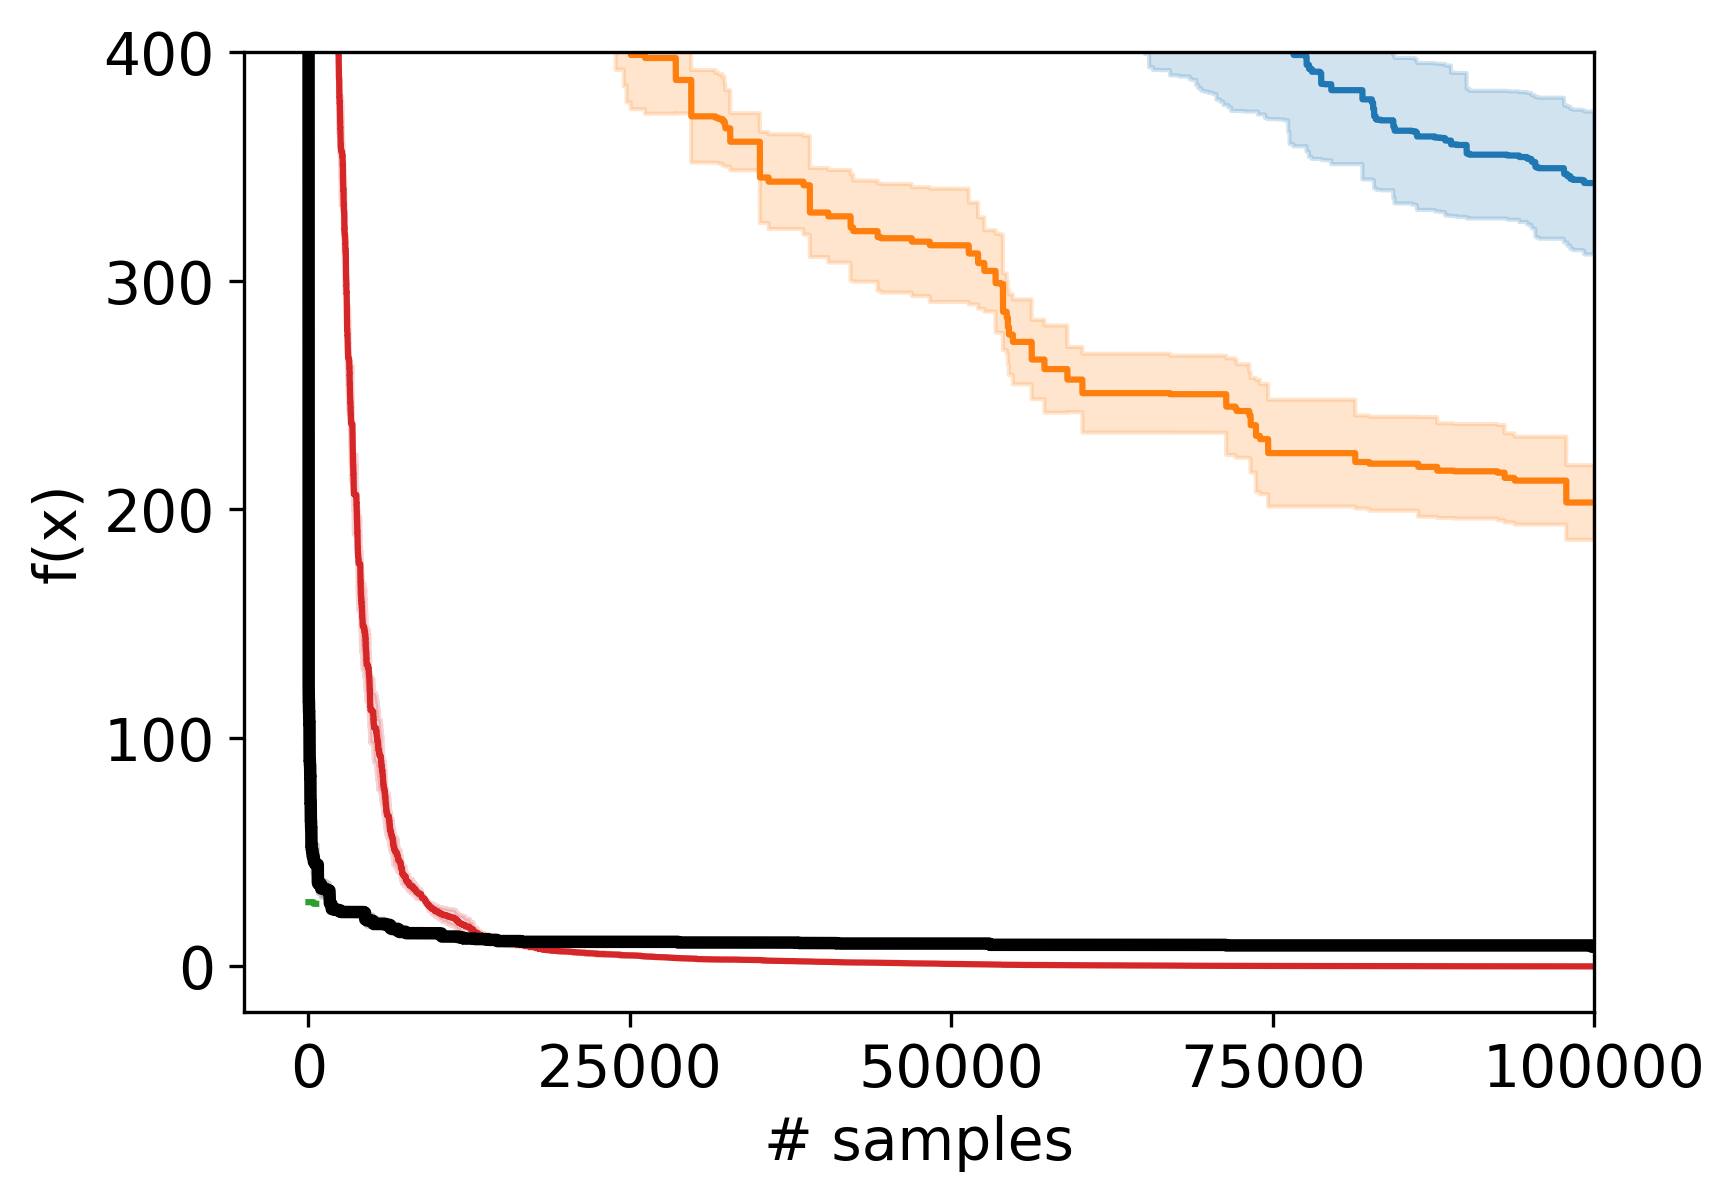

In [14]:
plot(stats_df, 'levy', 100, xlim=[-5000, 100000], ylim=[-20, 400], save_dir='/projects/mcmm/figures/')

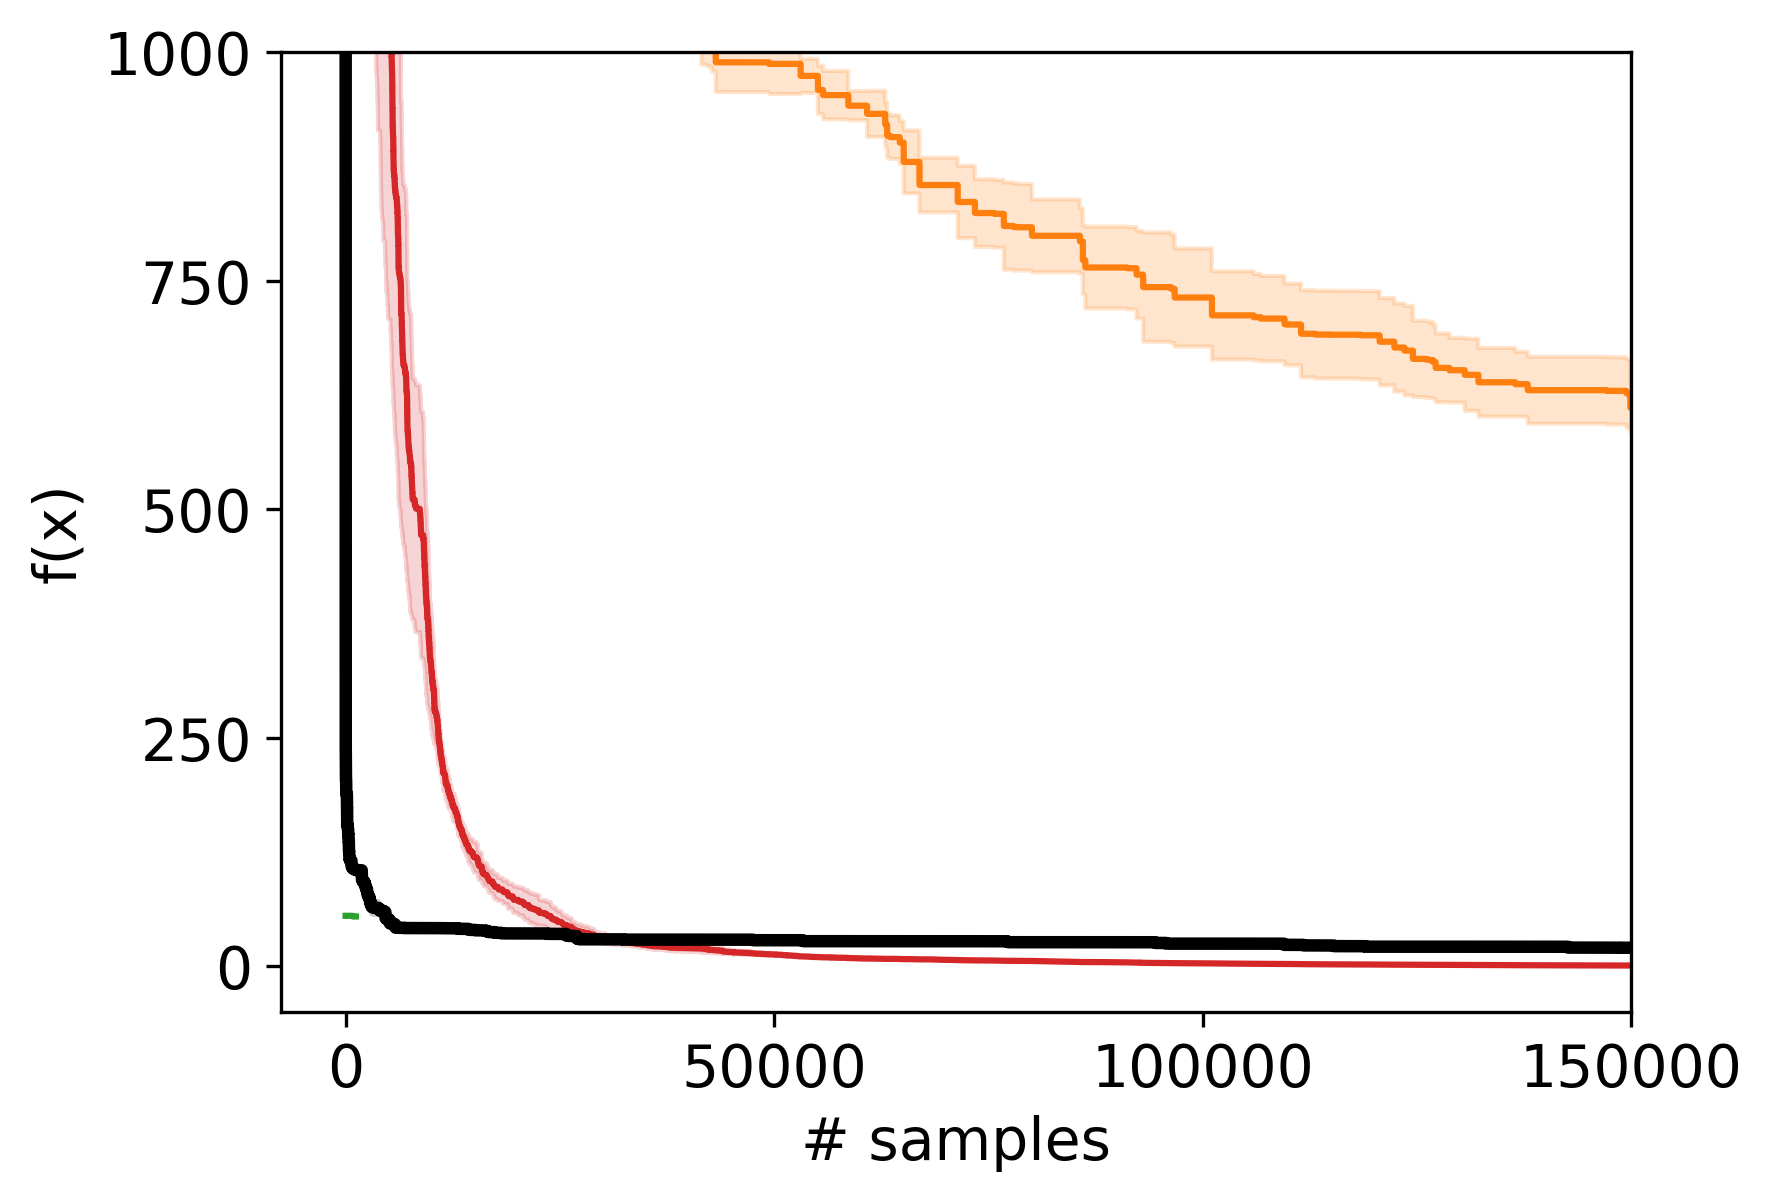

In [15]:
plot(stats_df, 'levy', 200, xlim=[-7500, 150000], ylim=[-50, 1000], save_dir='/projects/mcmm/figures/')

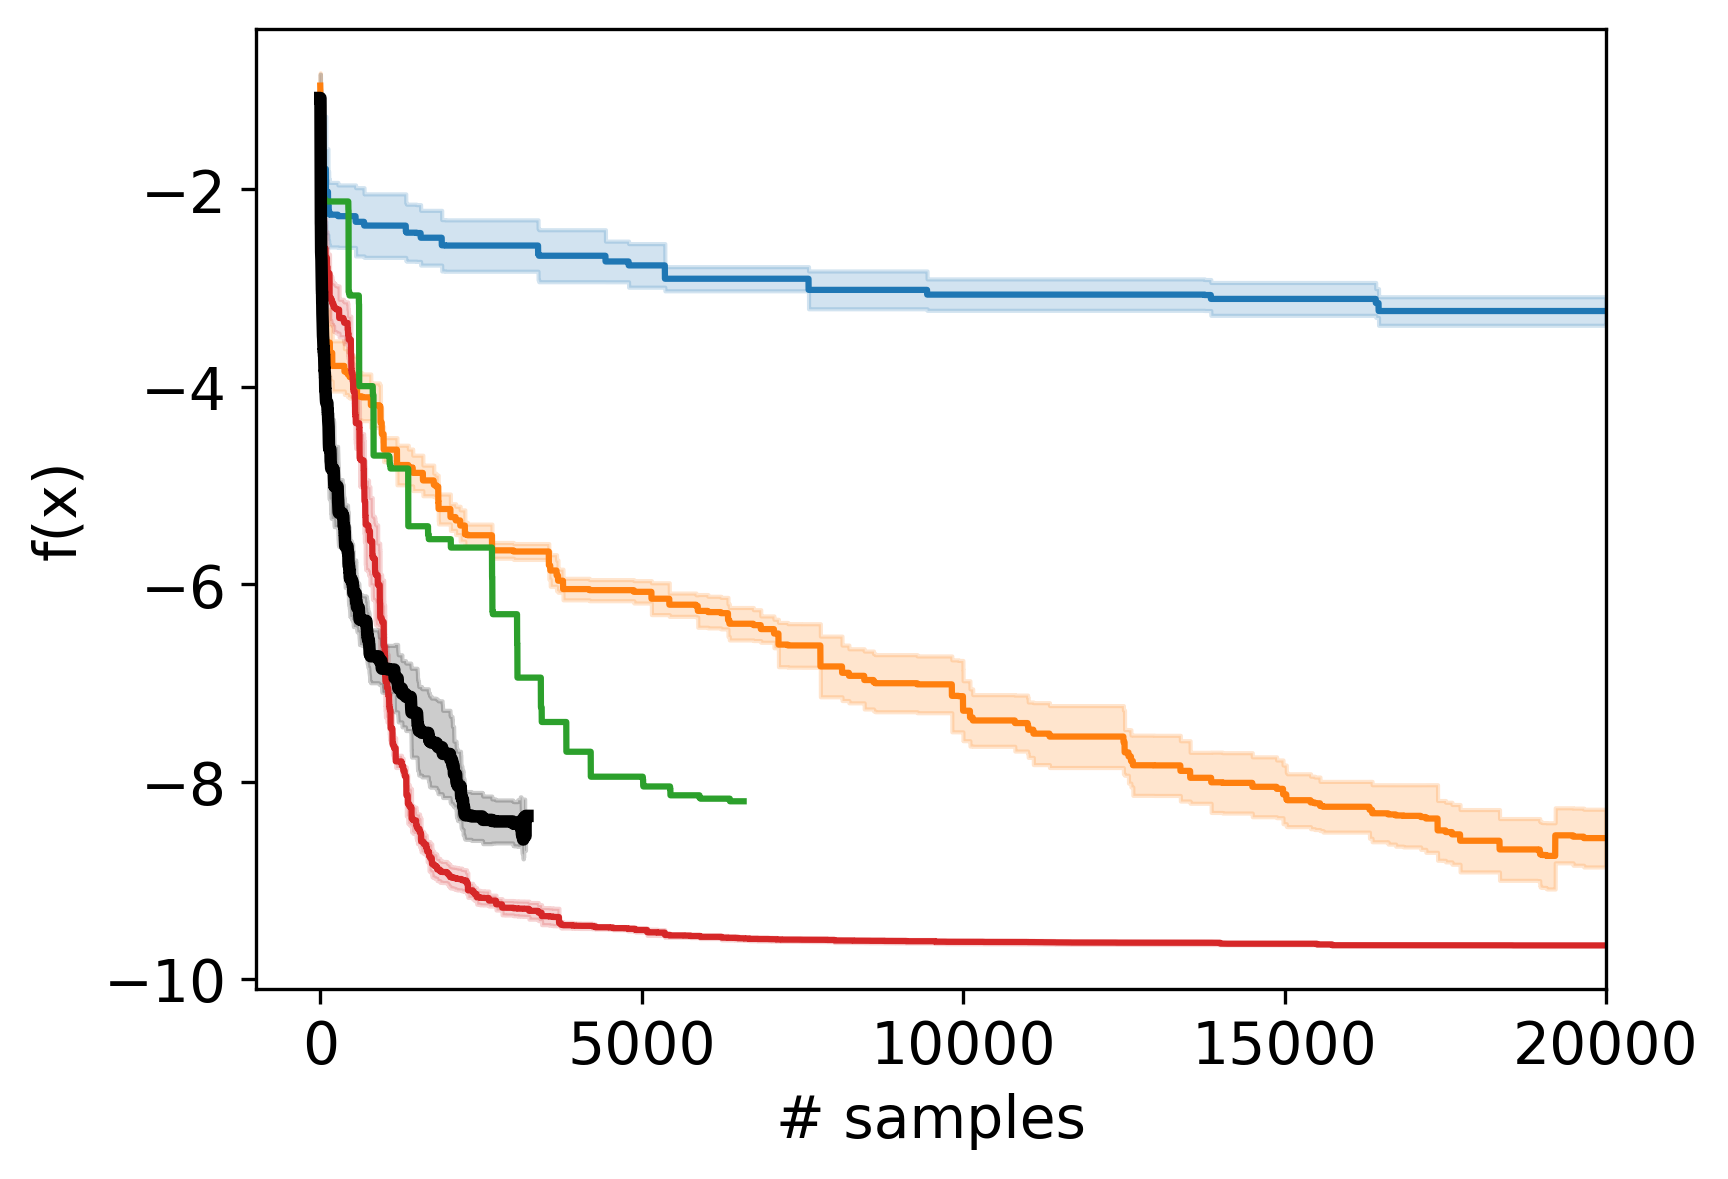

In [16]:
plot(stats_df, 'michalewicz', 10, xlim=[-1000, 20000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

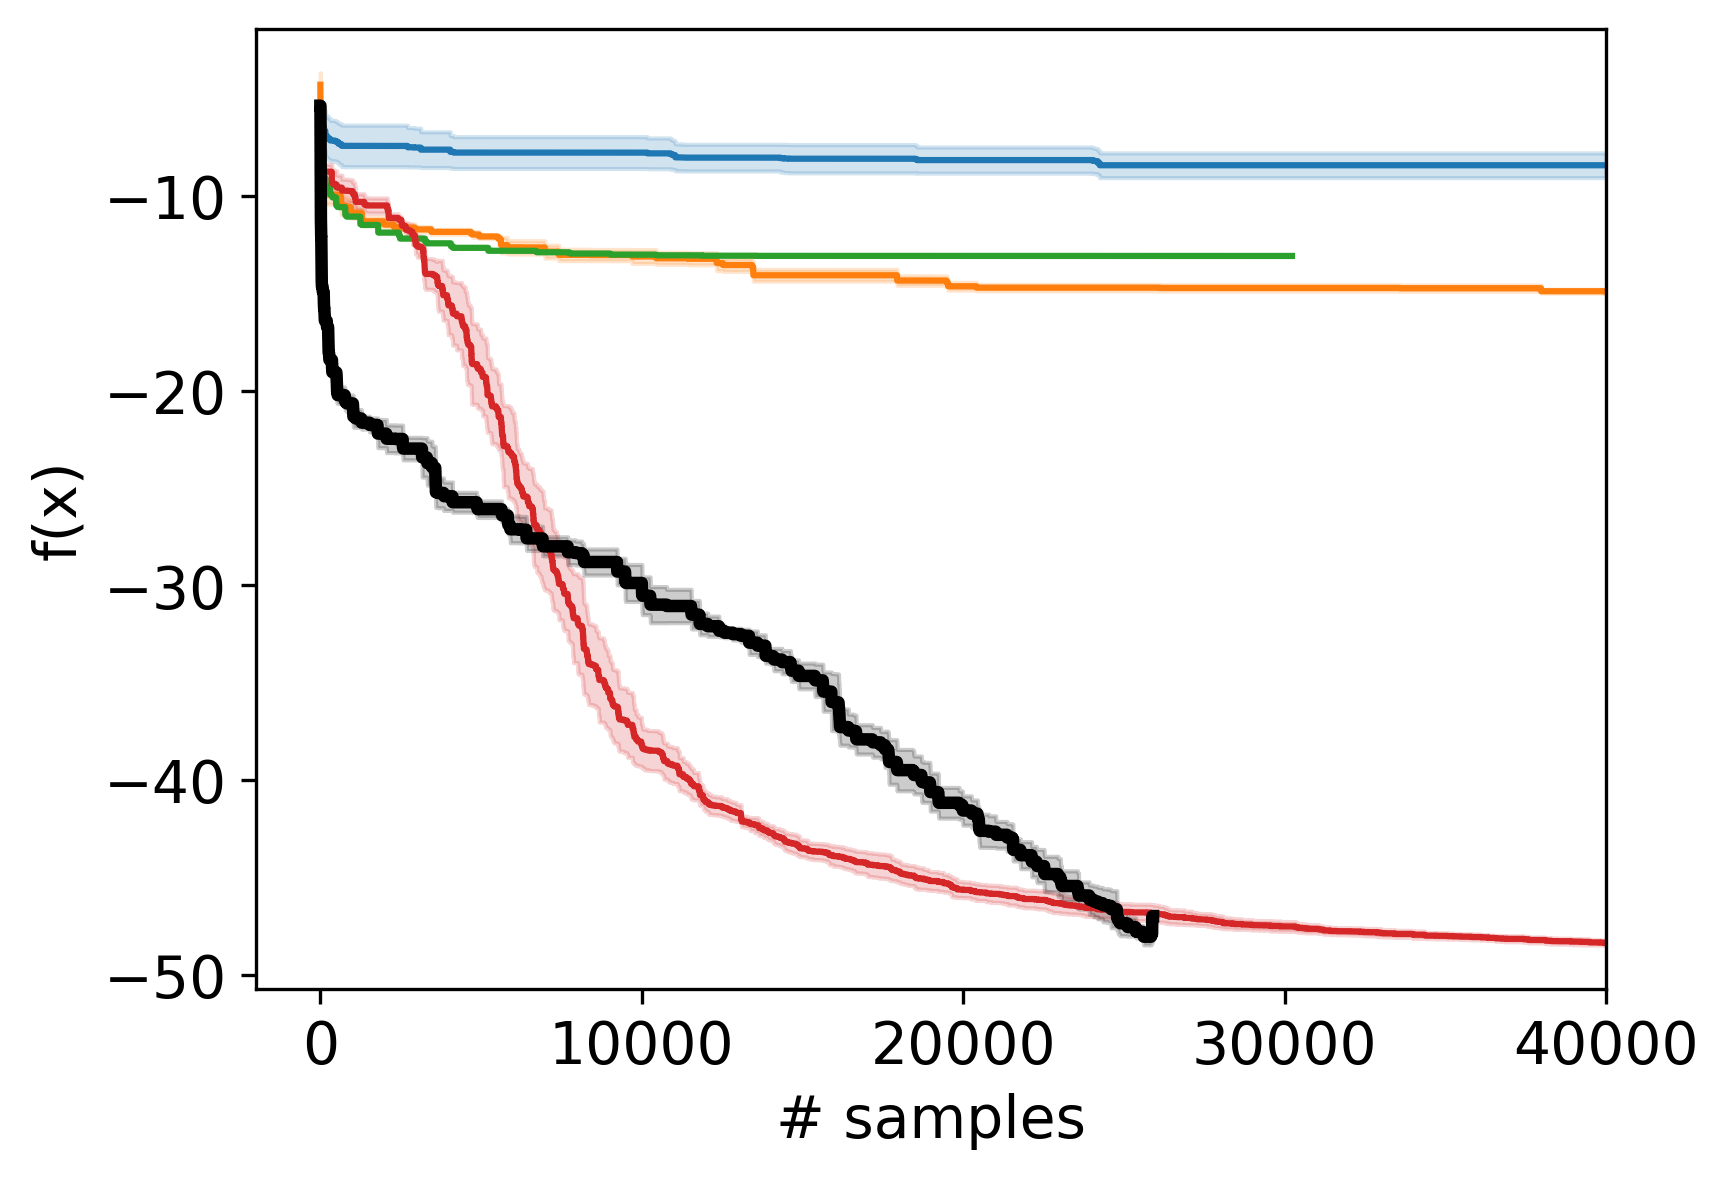

In [17]:
plot(stats_df, 'michalewicz', 50, xlim=[-2000, 40000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

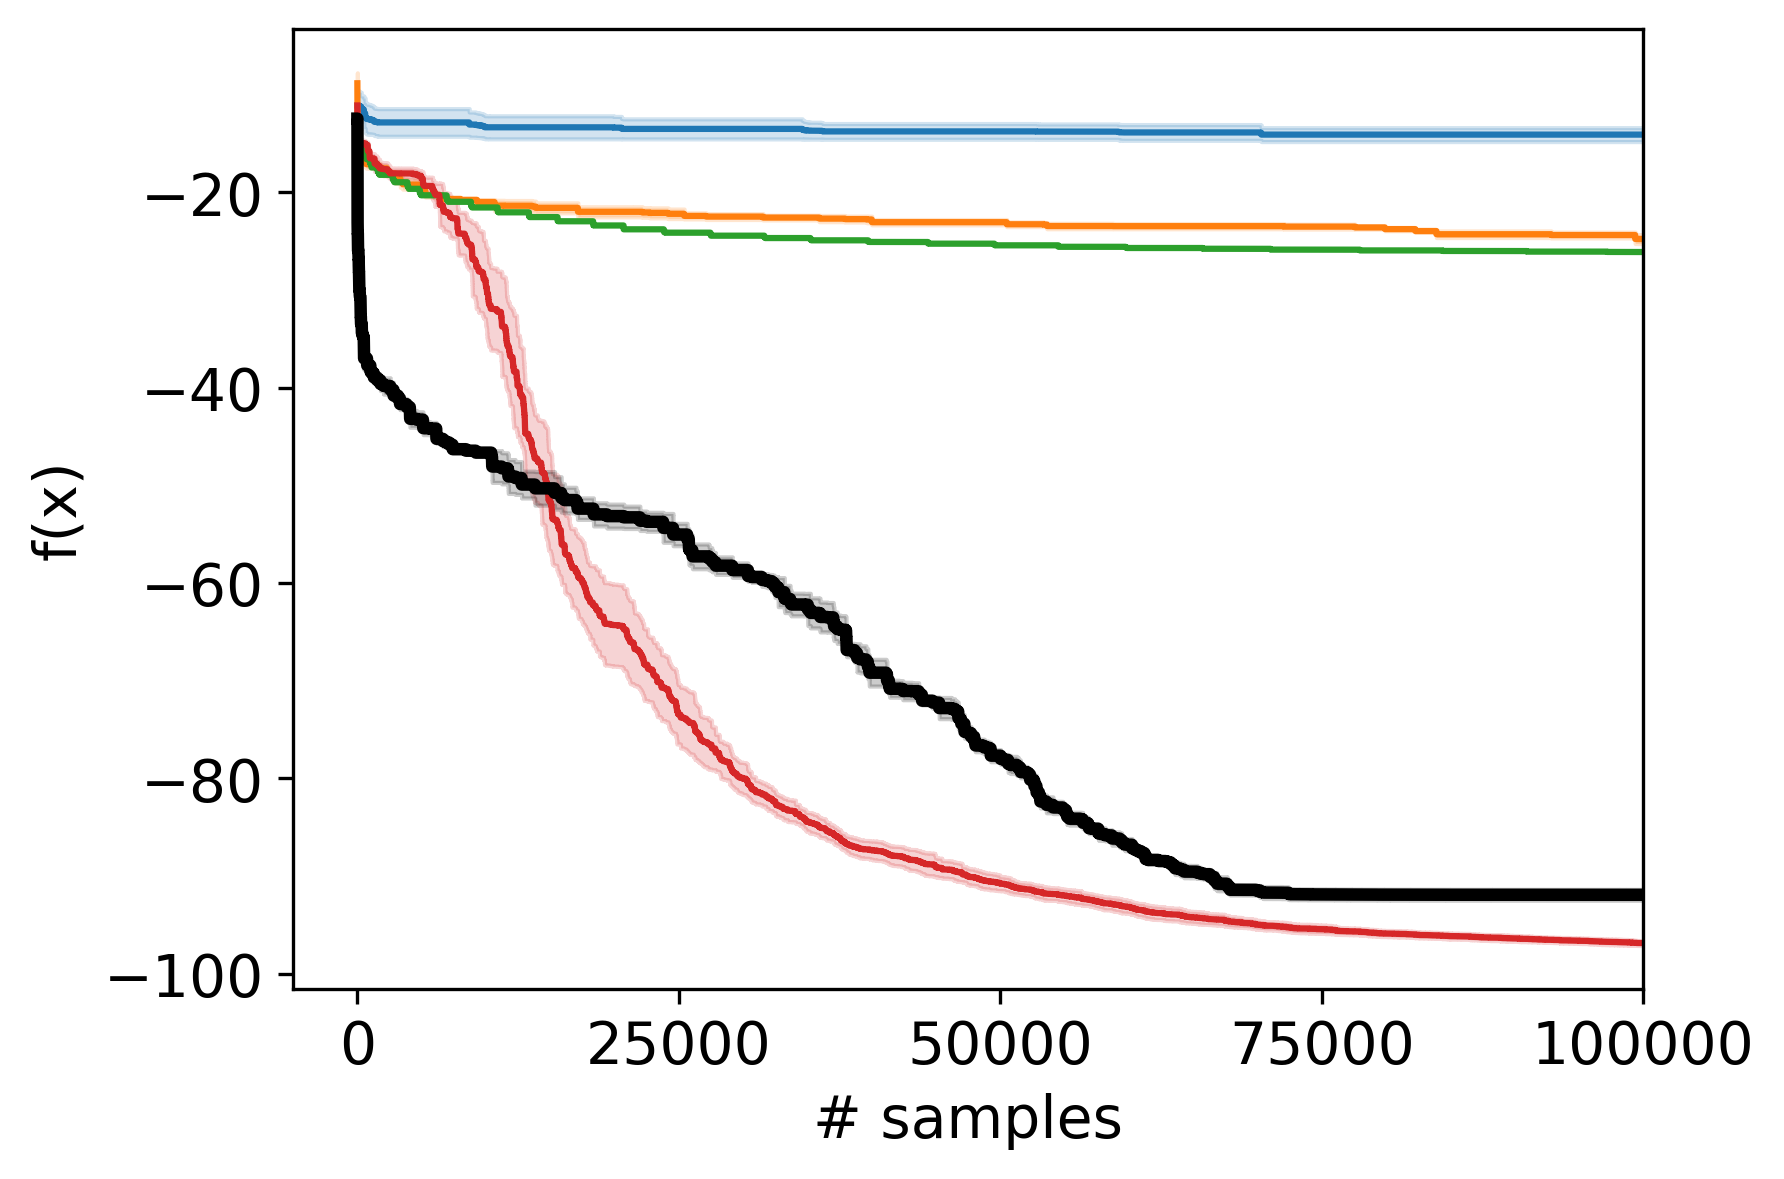

In [18]:
plot(stats_df, 'michalewicz', 100, xlim=[-5000, 100000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

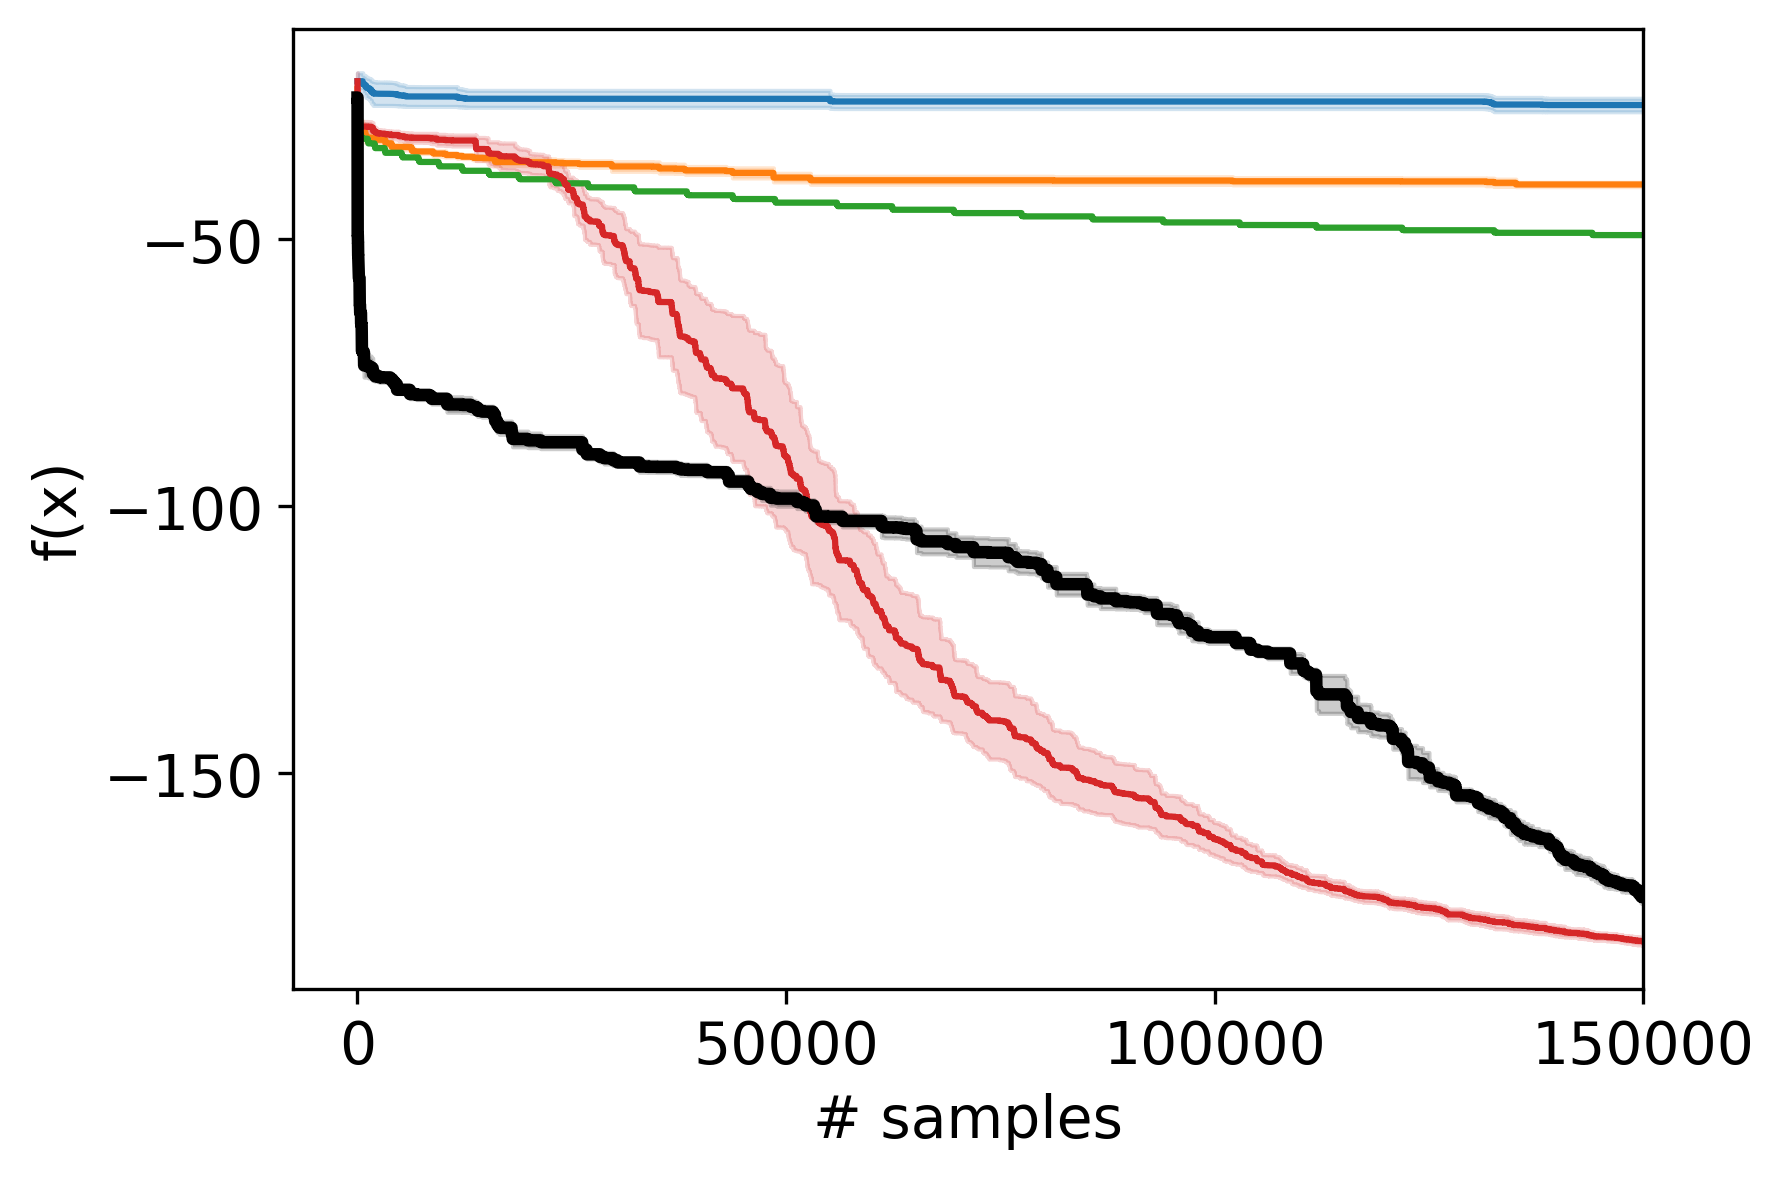

In [19]:
plot(stats_df, 'michalewicz', 200, xlim=[-7500, 150000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

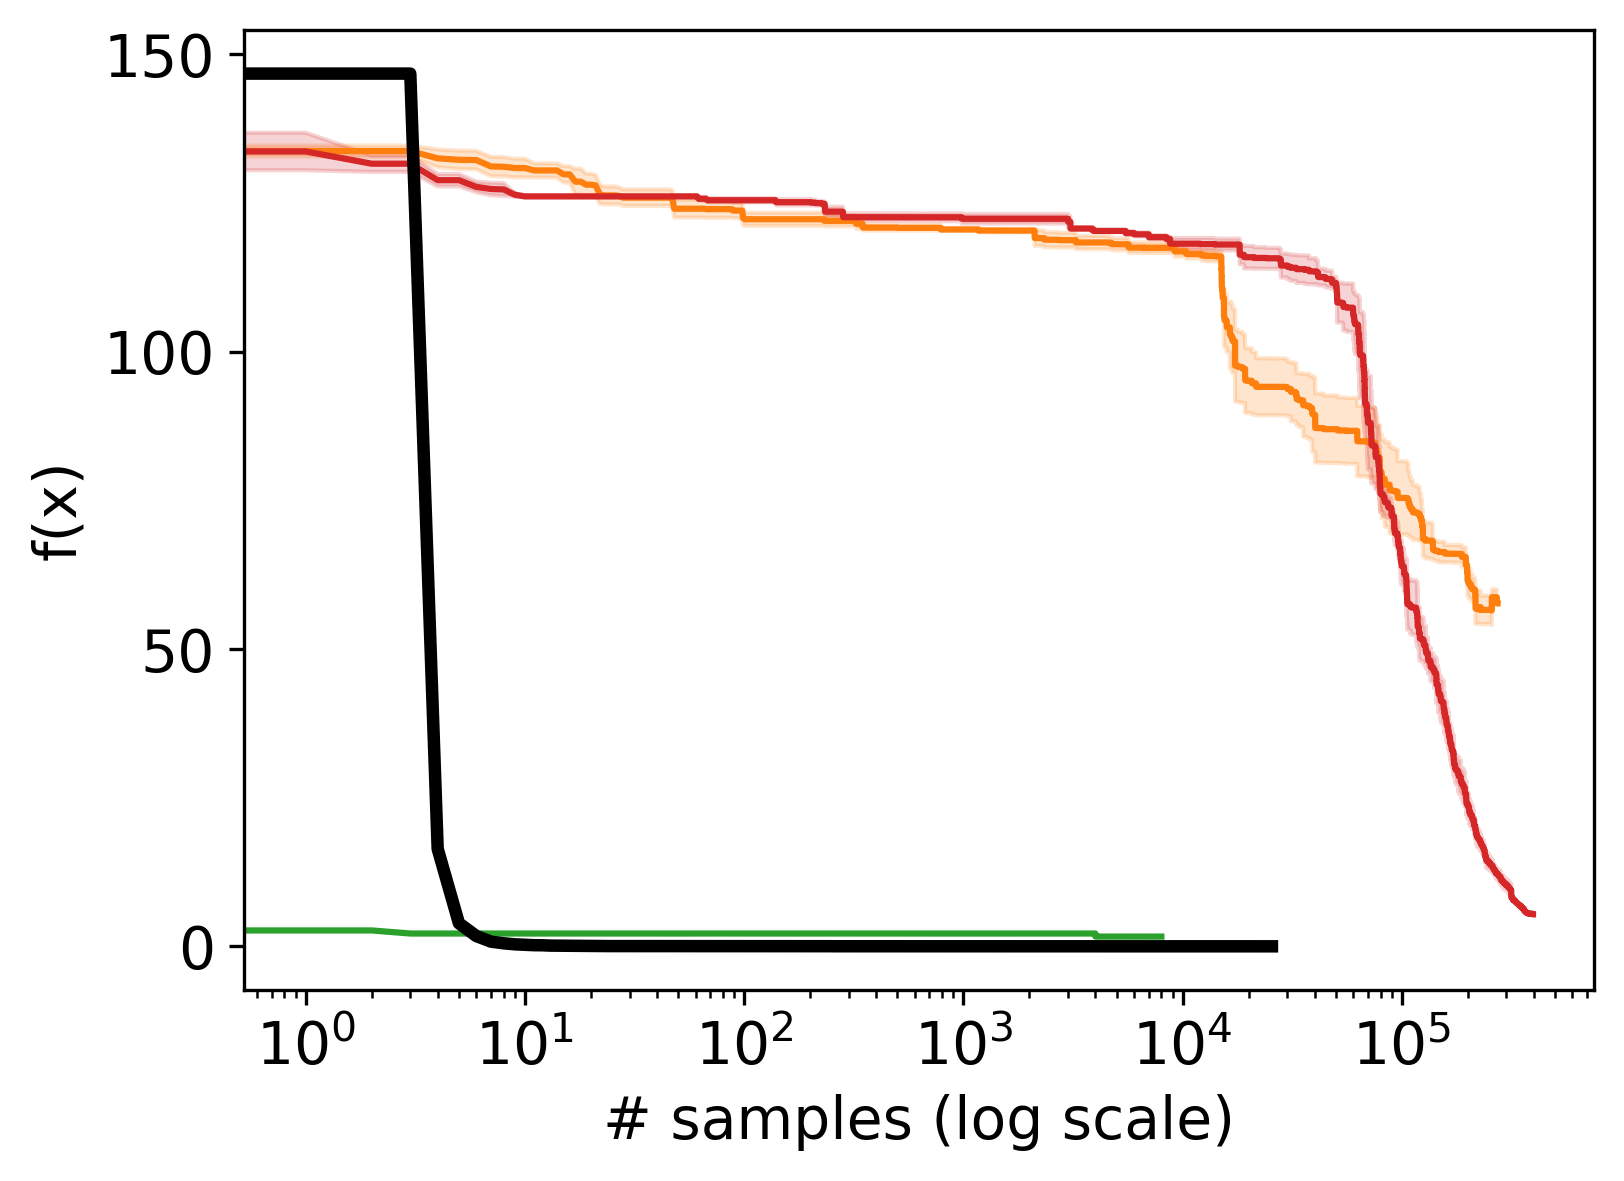

In [20]:
plot(stats_df, 'biggsbi1', 1001, xlim=[None, None], ylim=[None, None], log_x=True, save_dir='/projects/mcmm/figures/')

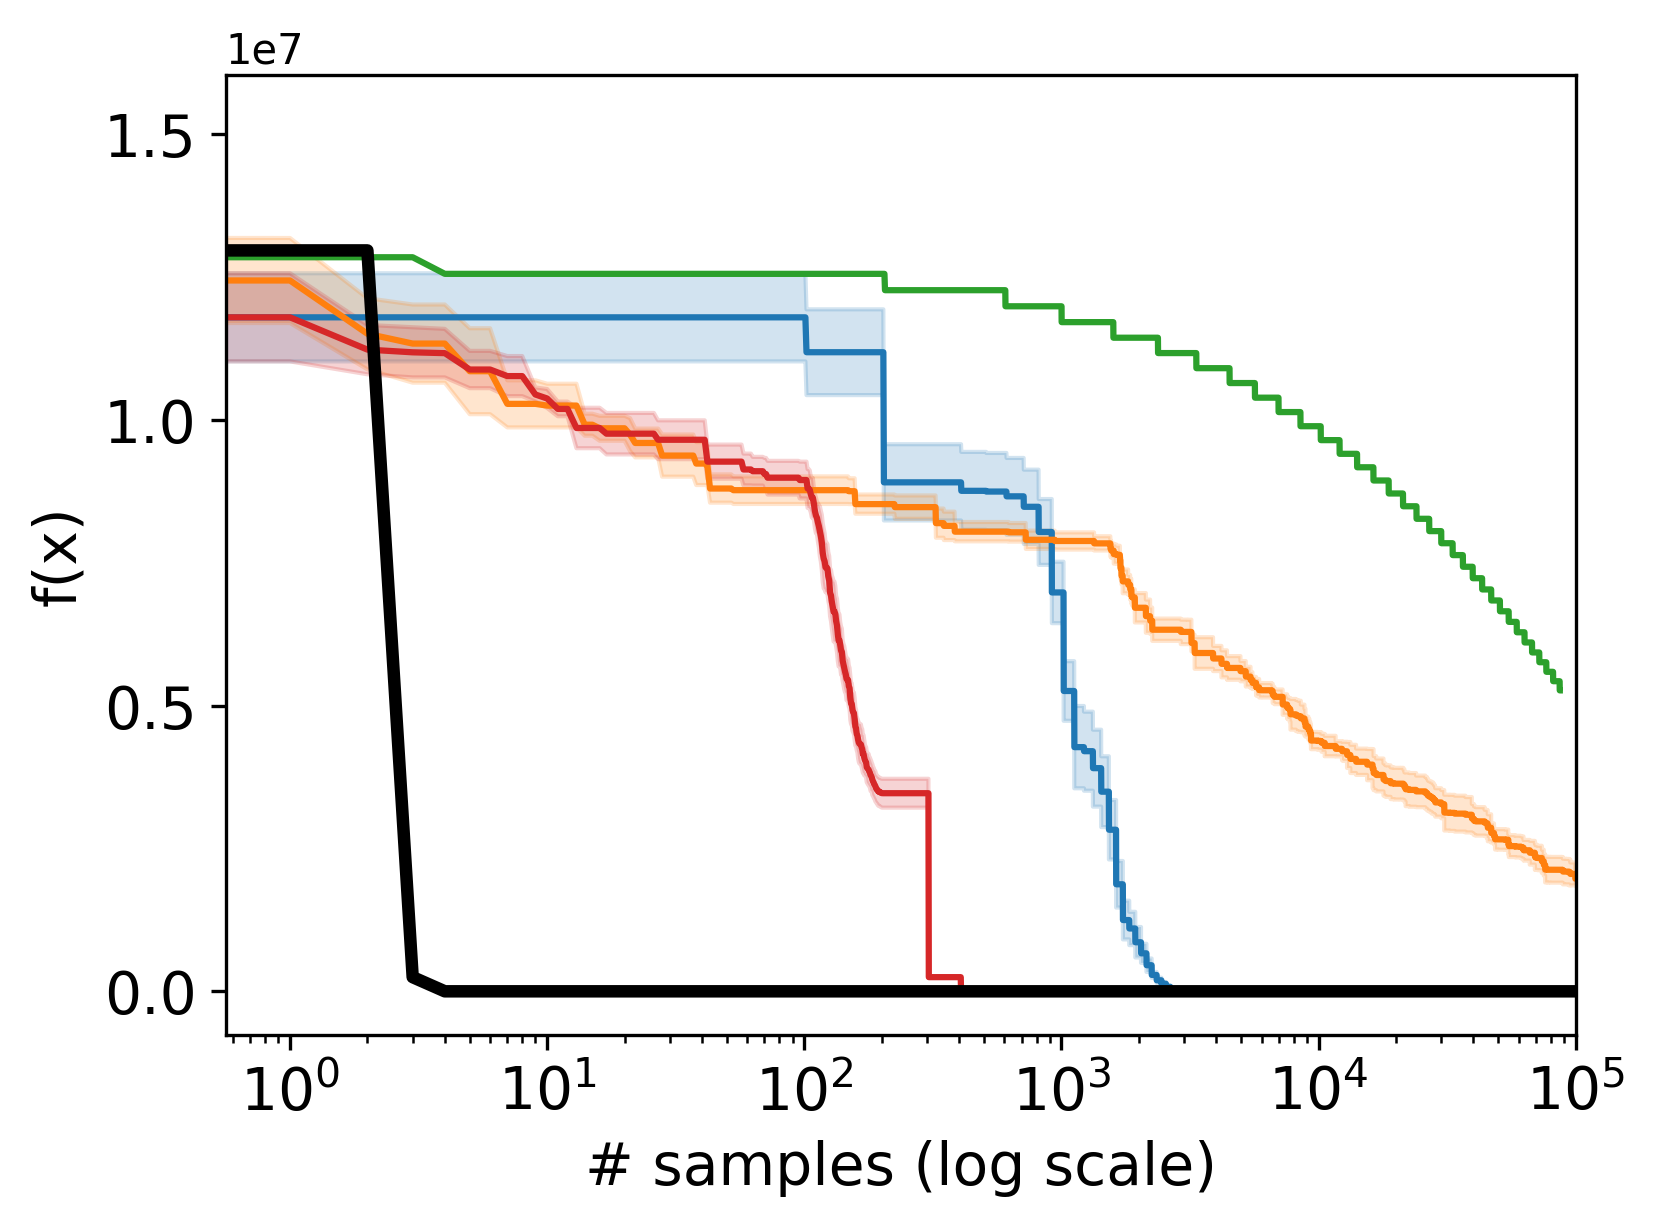

In [21]:
plot(stats_df, 'harkerp', 101, xlim=[None, 100000], ylim=[None, None], log_x=True, save_dir='/projects/mcmm/figures/')

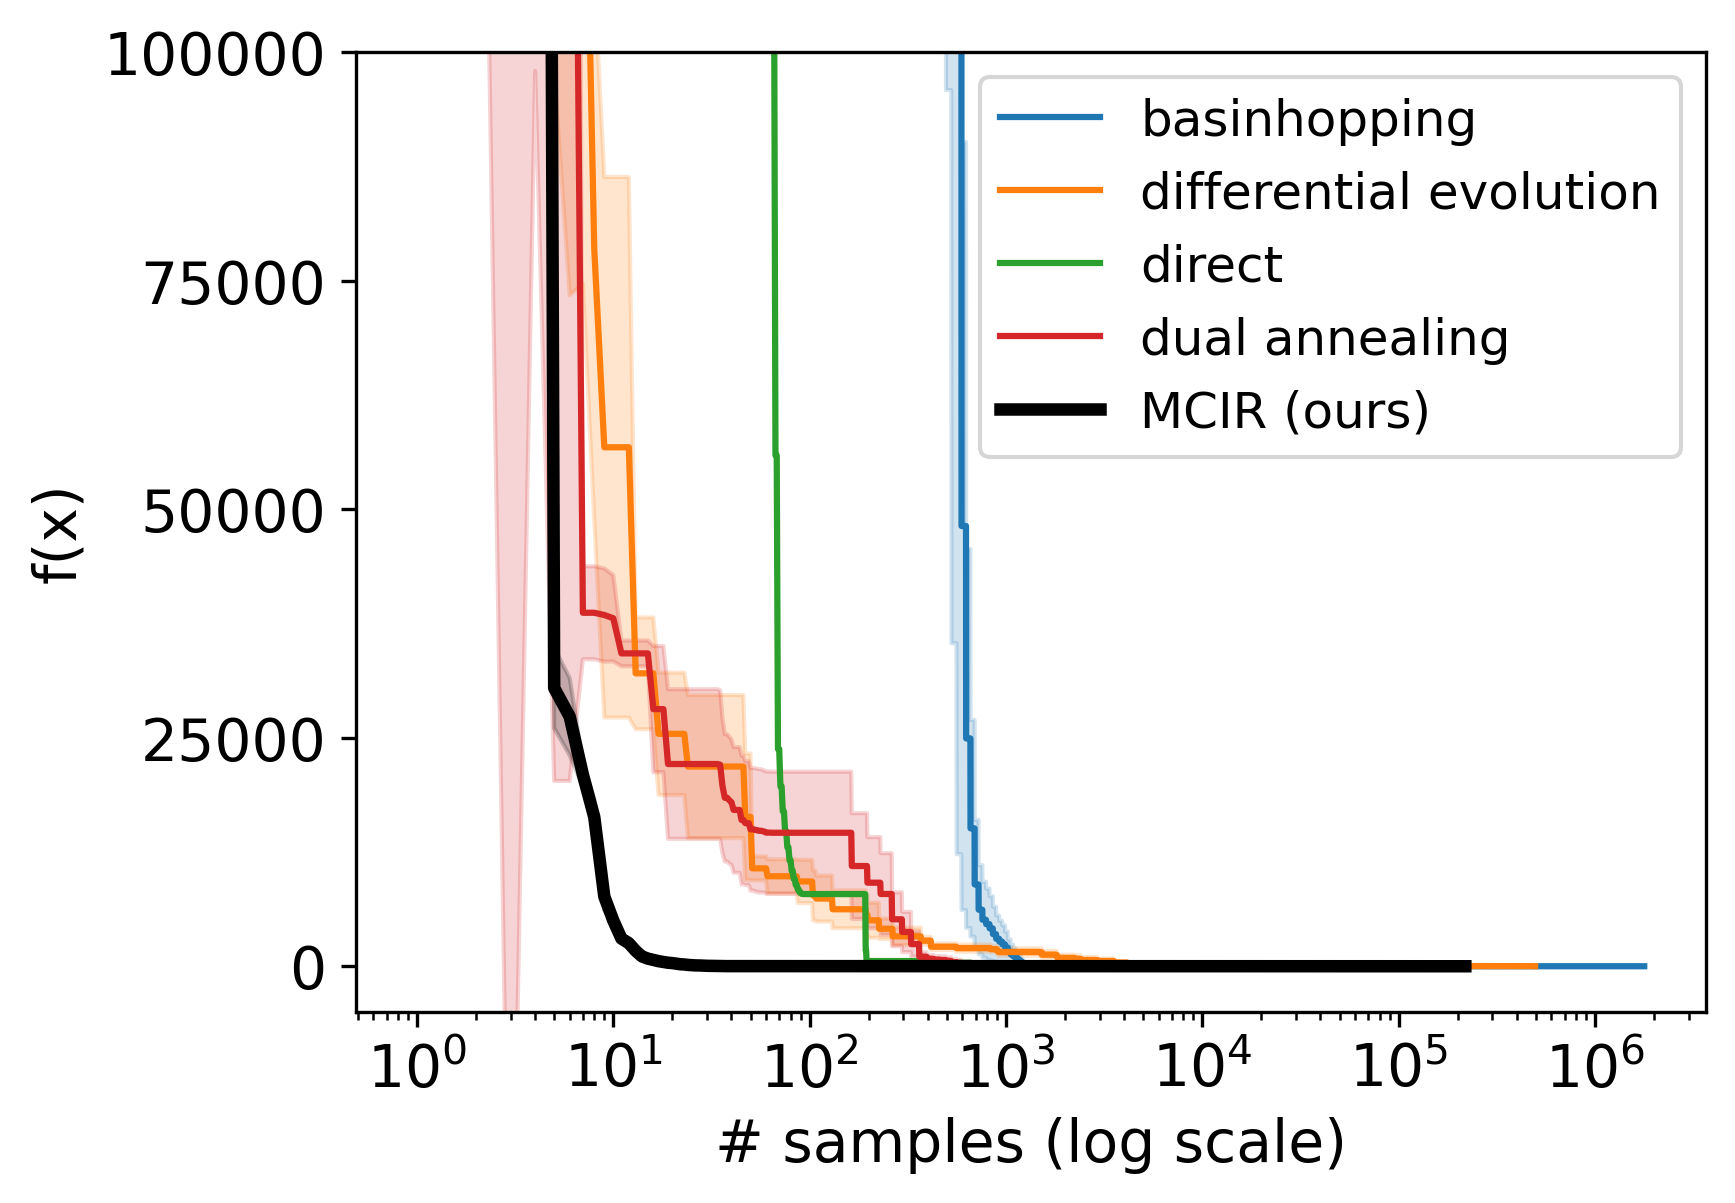

In [22]:
plot(stats_df, 'watson', 32, xlim=[None, None], ylim=[-5000, 100000], log_x=True, save_dir='/projects/mcmm/figures/',
    legend=True)

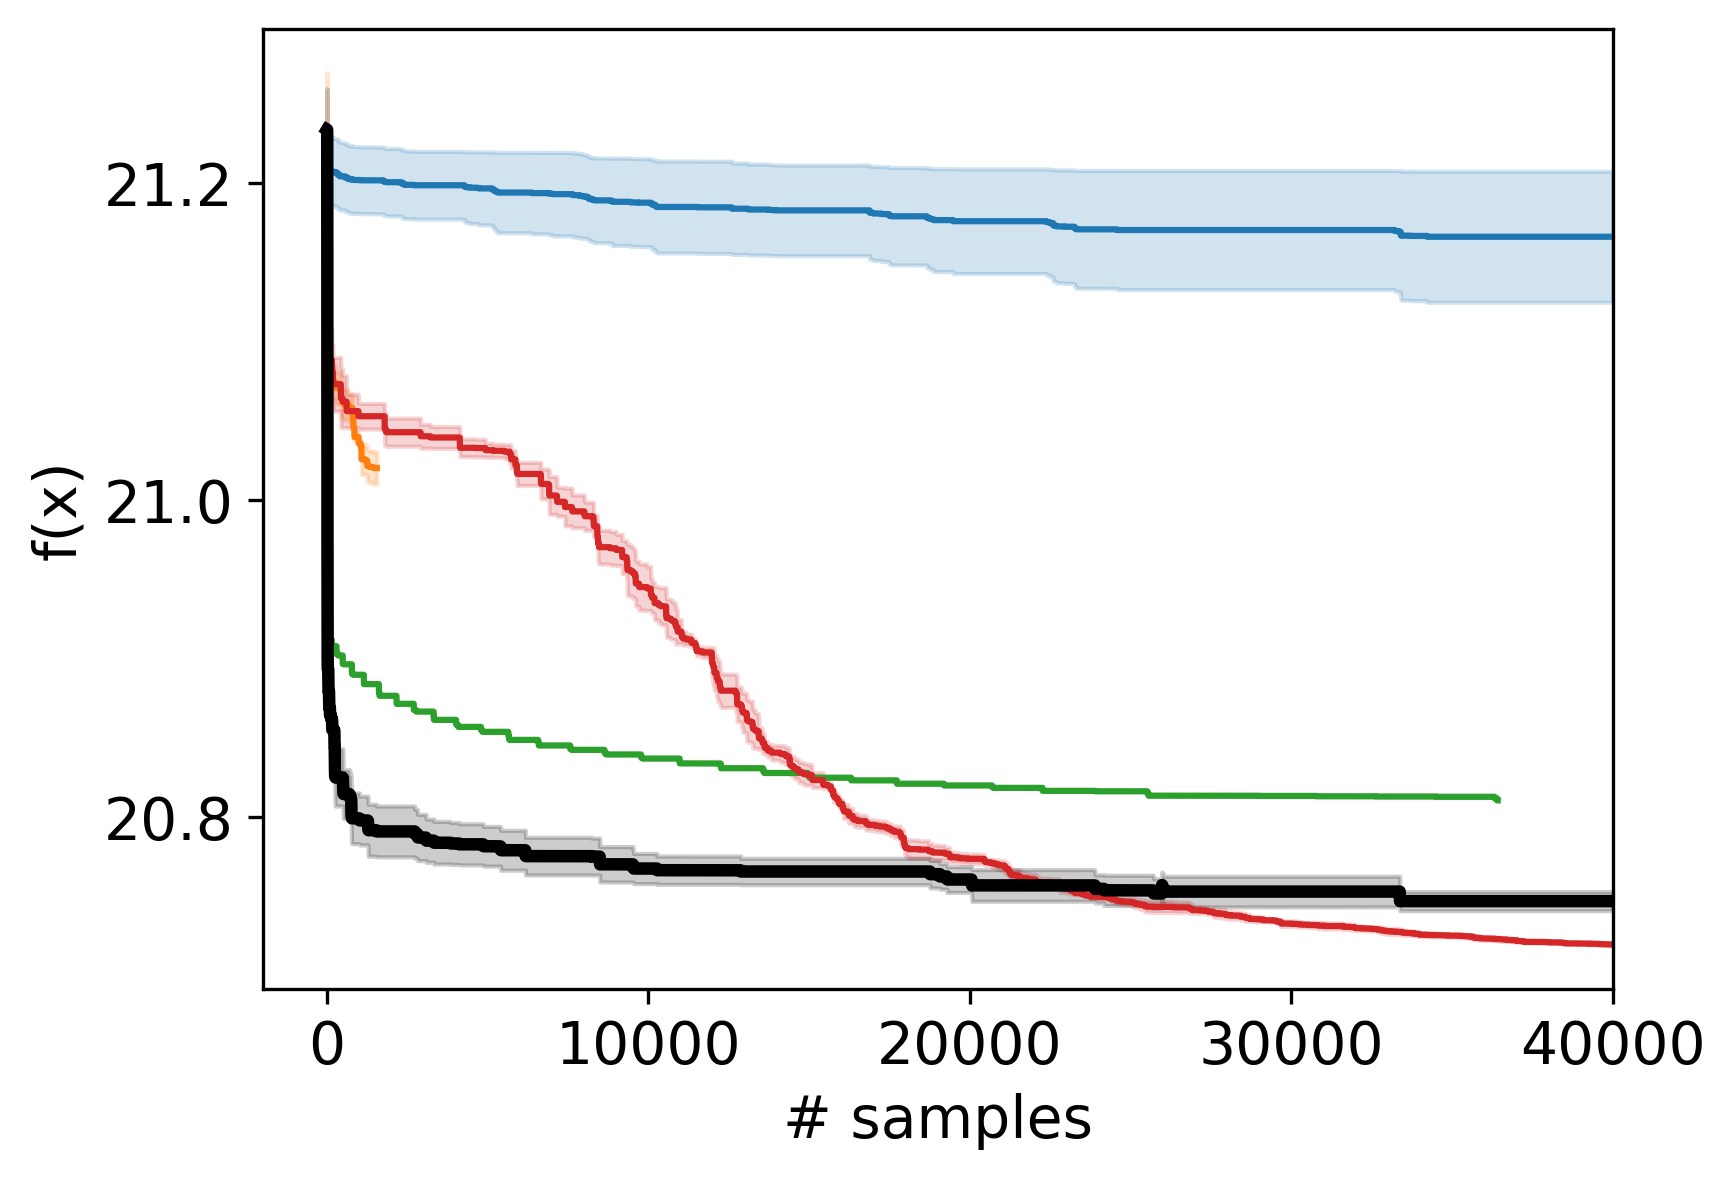

In [23]:
plot(stats_df, 'nn-ackley', 50, xlim=[-2000, 40000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

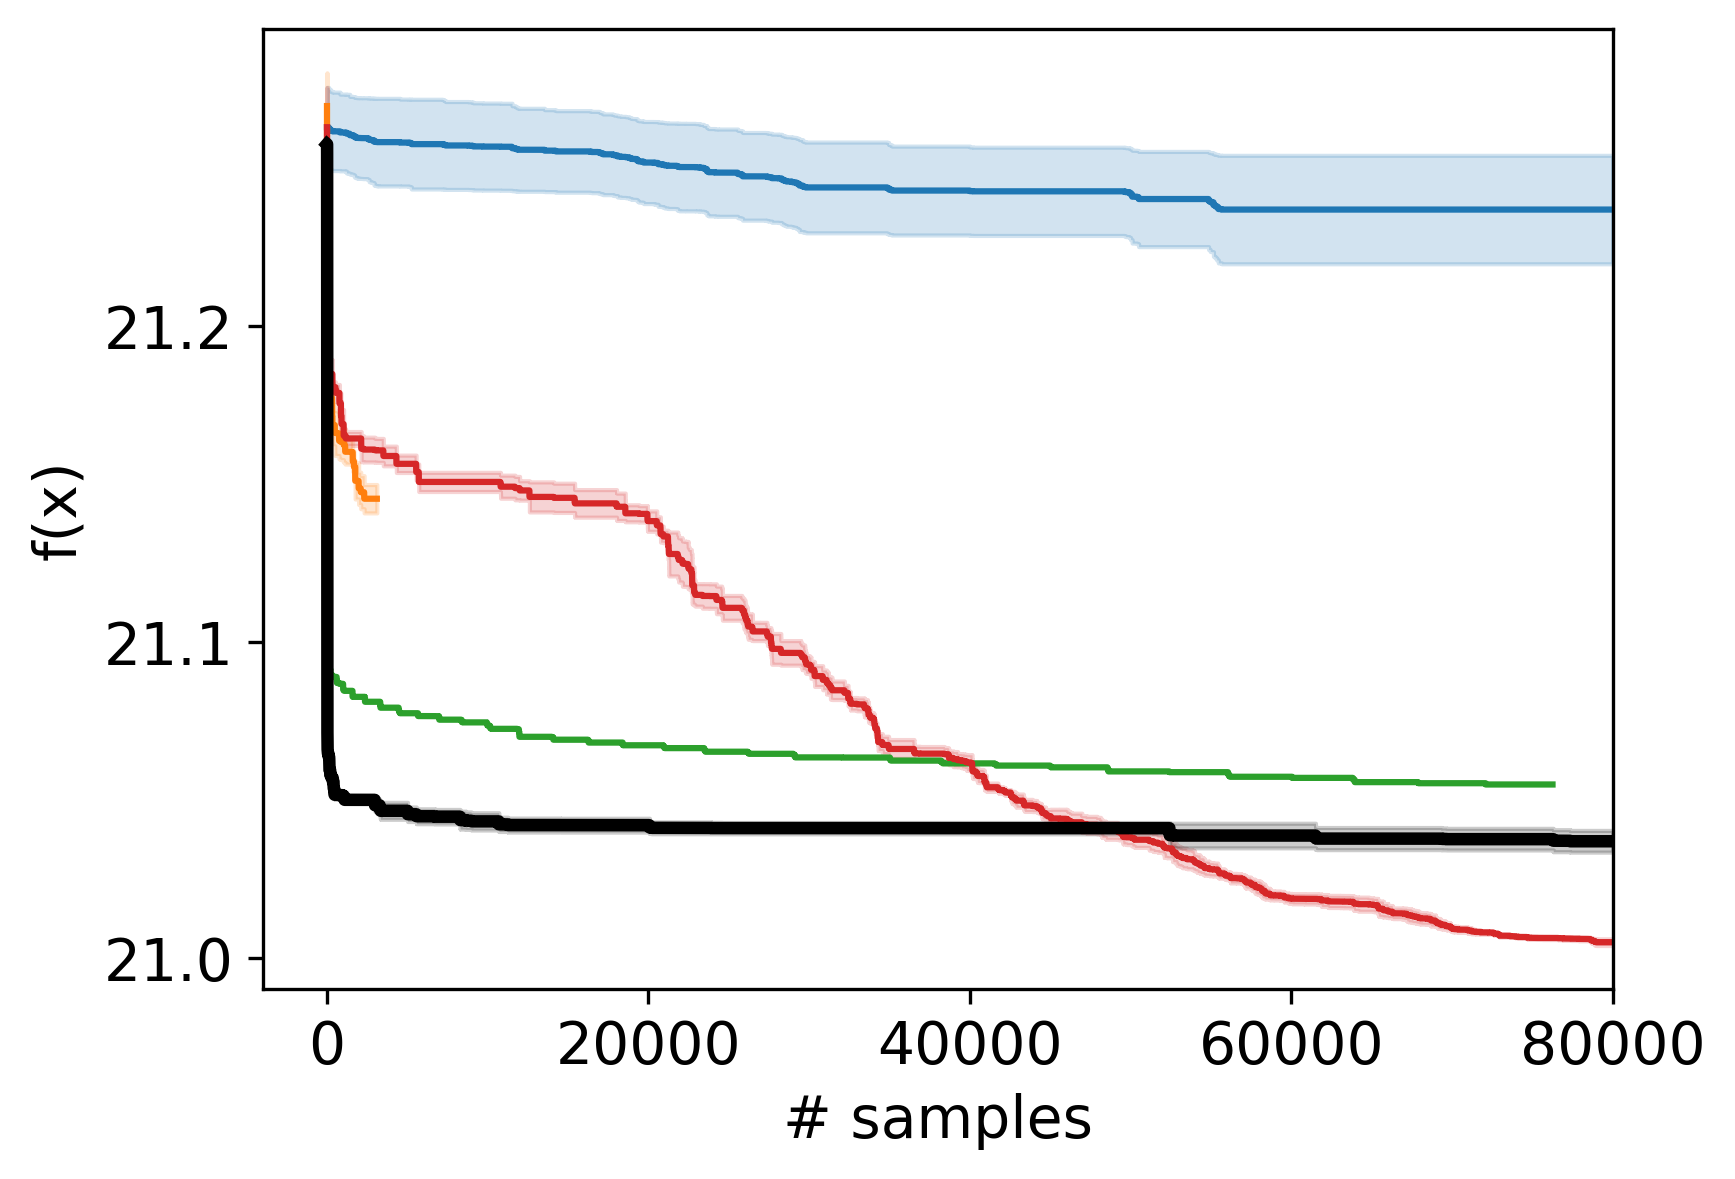

In [24]:
plot(stats_df, 'nn-ackley', 100, xlim=[-4000, 80000], ylim=[None, None], save_dir='/projects/mcmm/figures/')

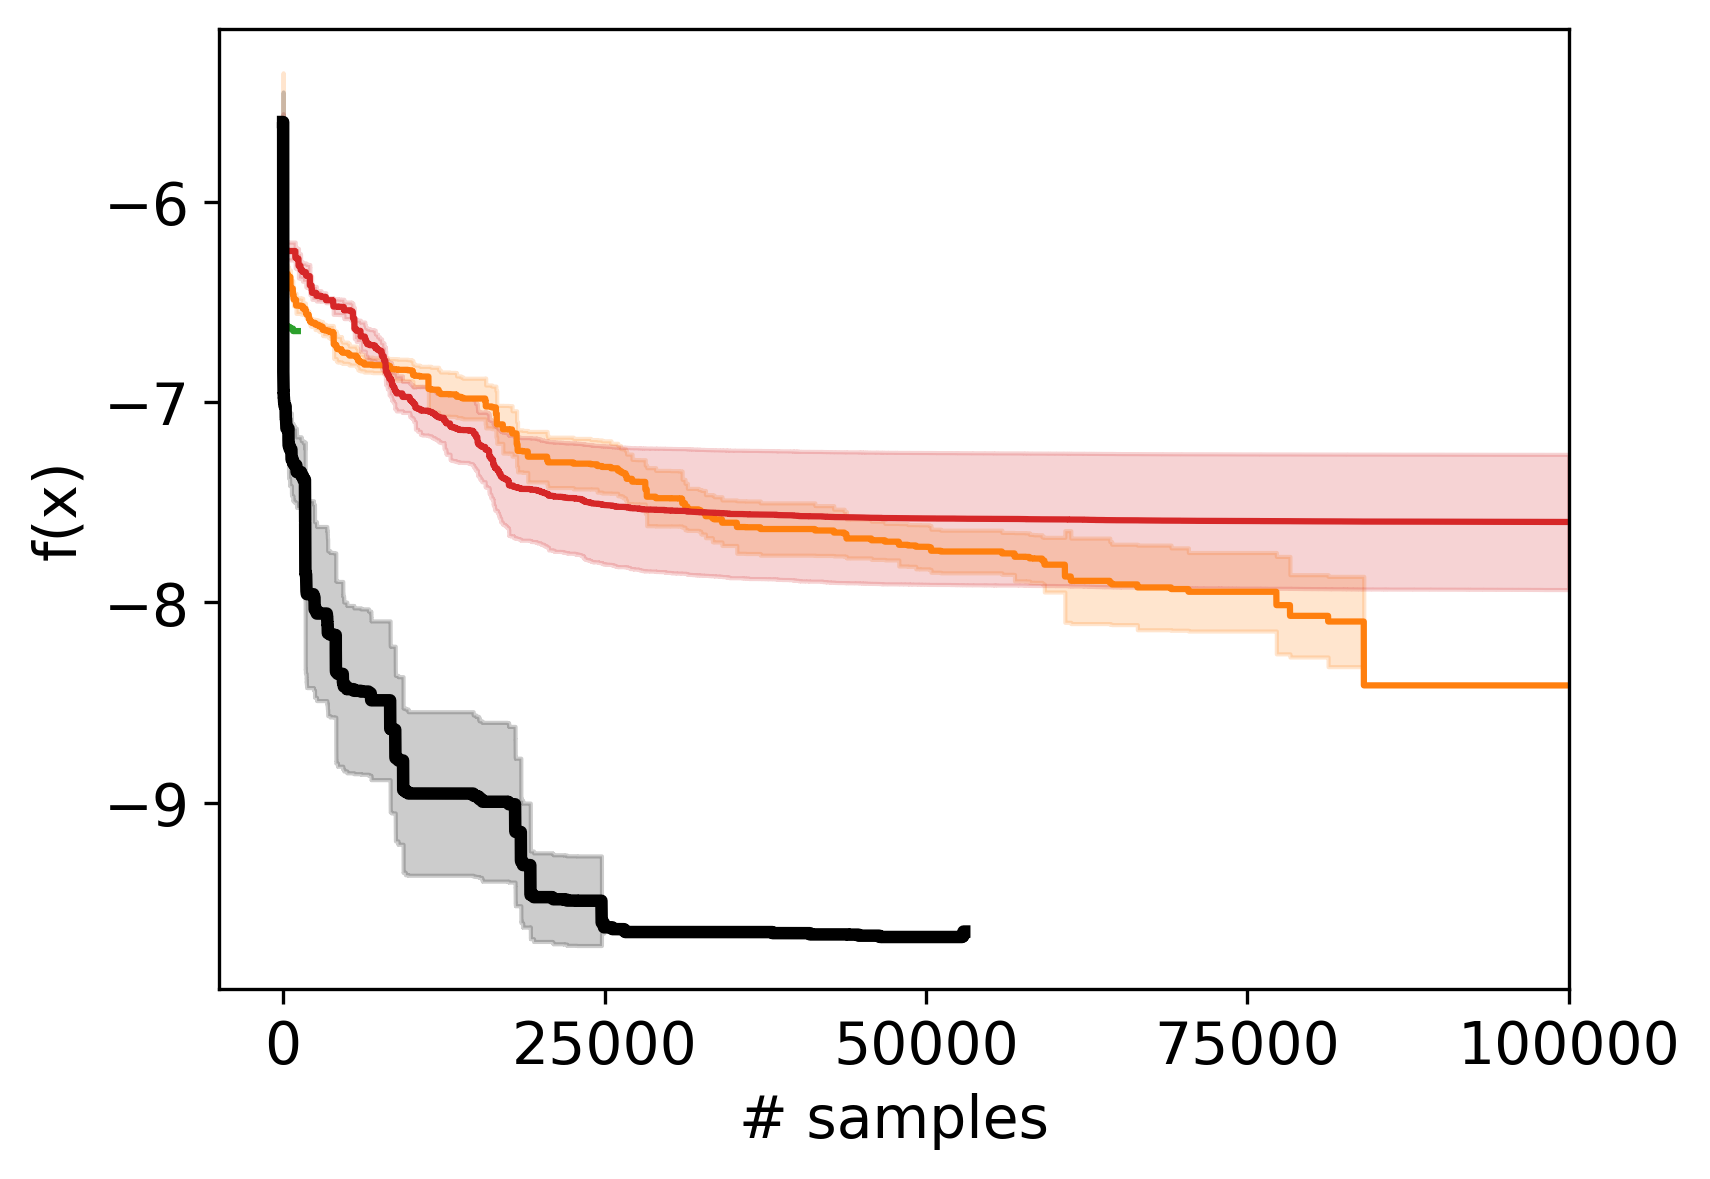

In [25]:
plot(stats_df, 'nn-michalewicz', 50, xlim=[-5000, 100000], ylim=[None, None], exclude_algos=['basinhopping'], save_dir='/projects/mcmm/figures/')

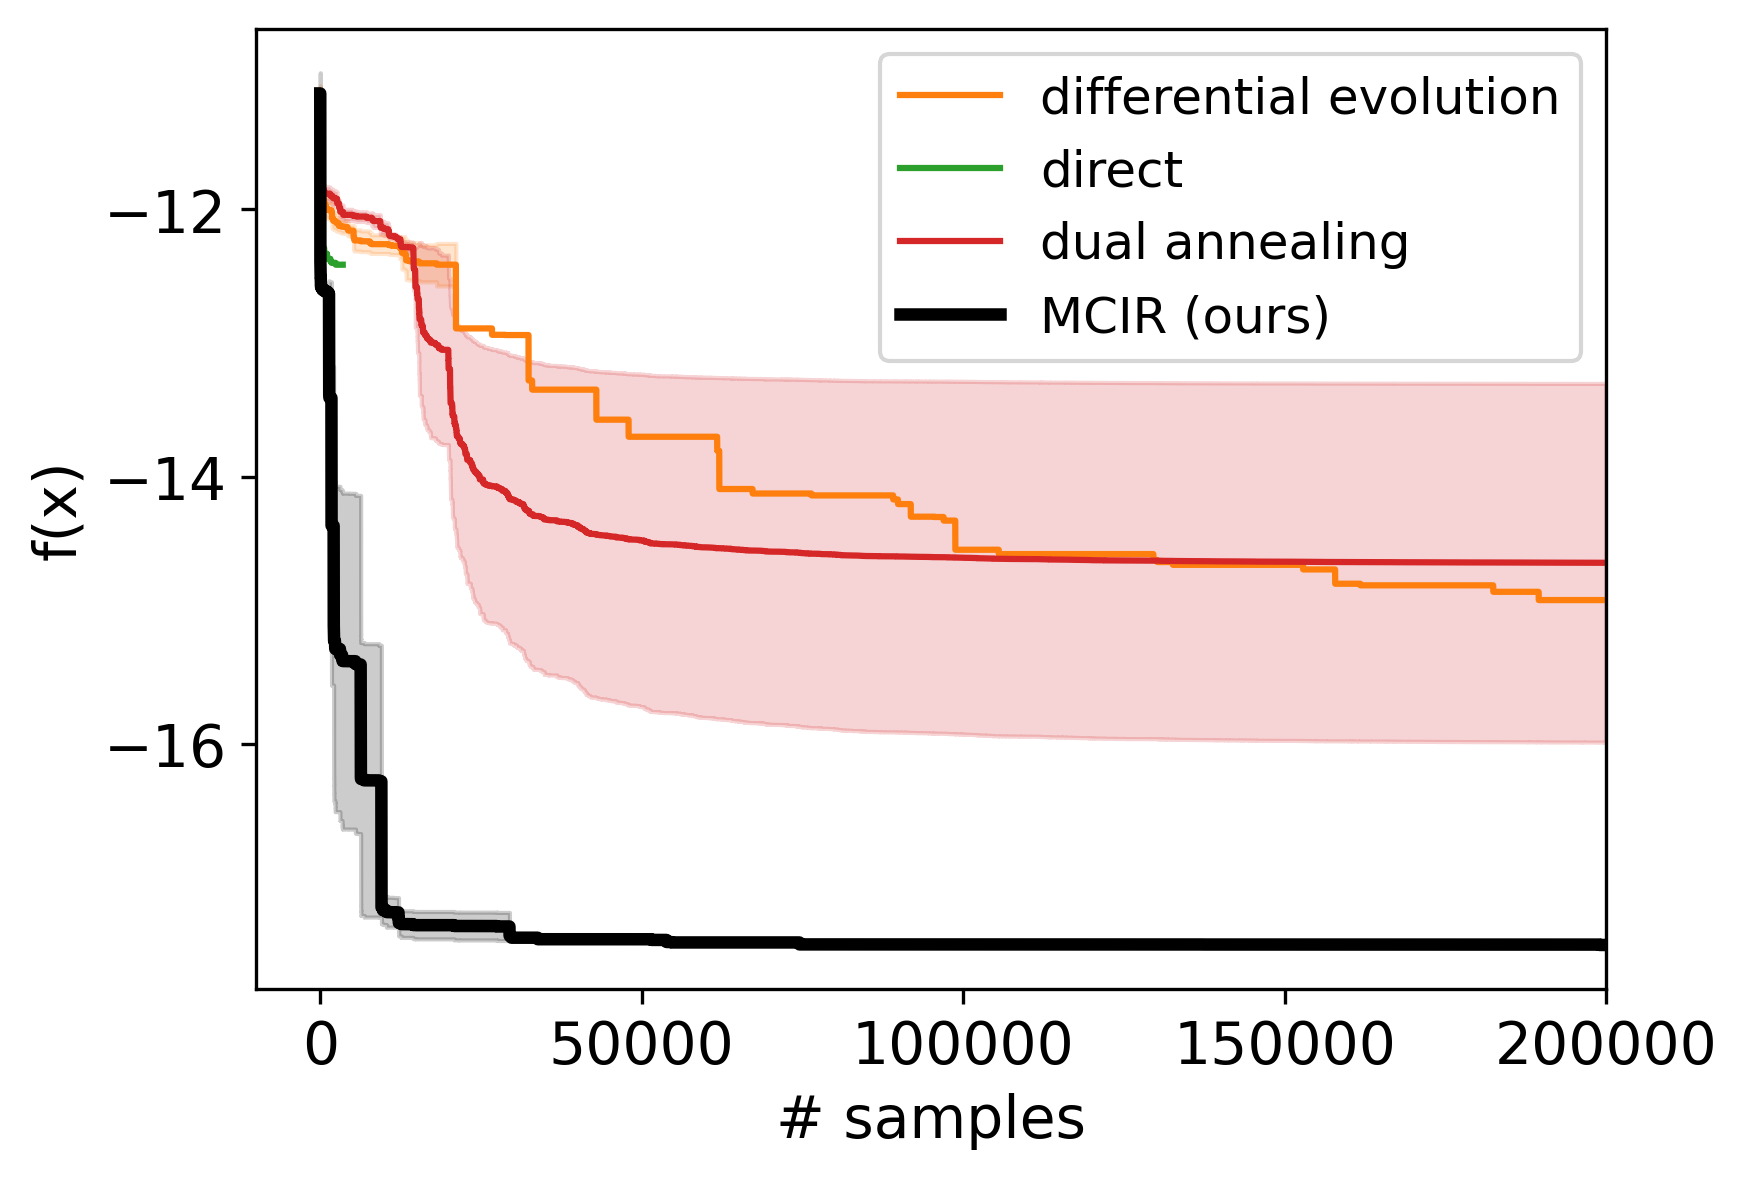

In [26]:
plot(stats_df, 'nn-michalewicz', 100, xlim=[-10000, 200000], ylim=[None, None], exclude_algos=['basinhopping'], save_dir='/projects/mcmm/figures/',
    legend=True)